# Data exploration opdracht AI
* Studentnr: 0162556-81
* Naam en voornaam: Van Loon Andreas

# Scripts & Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

# Loading and parsing
Load data in a dataframe called dataframe and copy into df to allow access to the original dataframe
First glanse at the data.  Looking at csv file, the data is comma separated and the decimal is allready a decimal point.

In [2]:
data = pd.read_csv('datasets/Assignment - Data Exploration & Modelling - Data.csv')
df= data.copy()

In [3]:
data.head()

,Unnamed: 0,InputC1,InputC2,InputC3,InputC4,InputC5,InputC6,InputC7,InputC8,InputC9,...,InputA4,InputA5,InputA6,InputB1,InputB2,InputB3,InputB4,InputB5,InputB6,Target
0,2022-01-01 00:00:00,18.49650,18.81396,100.0696,618.6791,NaN,1931.360,7.272931,1878.295,1.549485,...,60.10090,7.385031,7.081979,27.39823,20.89696,260.1674,2.193955,NaN,6.236635,NaN
1,2022-01-01 00:05:00,18.49731,18.70401,100.0715,613.7349,NaN,1929.365,7.273591,1878.252,1.552745,...,60.09105,7.375766,7.136544,27.07825,26.92165,259.9575,2.187813,NaN,6.238485,NaN
2,2022-01-01 00:10:00,18.49693,18.59405,100.0733,608.7906,NaN,1924.322,7.274251,1878.209,1.556006,...,60.08120,7.366502,7.085941,26.75828,14.01370,259.7475,2.181671,NaN,6.240336,NaN
3,2022-01-01 00:15:00,18.49603,18.48410,100.0751,603.8464,NaN,1919.279,7.274910,1878.167,1.559266,...,60.07135,7.357237,6.743883,26.50328,5.78938,259.5375,2.175529,NaN,6.242187,NaN
4,2022-01-01 00:20:00,18.49512,18.37415,100.0770,598.9022,NaN,1914.235,7.275570,1878.124,1.562526,...,60.06150,7.347972,6.621848,26.29828,39.27962,259.3275,2.169388,NaN,6.244037,NaN


Renaming the columns with a recognizable name for future understanding.
Better to do this with the separate excel file "variable description".  Change was not made to avoid having to change all dataframe names.

In [4]:
columns = ['Date',
'O2 percentage in tank 1 [%]',
'Liquid to reduce the pH in tank 1 [l/h]',
'Filtered sludge going back to tank 1 [m3/h]',
'Outside air 1 [Nm3/h]',
'Height in tank 1 [m]',
'Flowrate to pH measurement in tank 1 [l/h]',
'pH of liquid in tank 1	[pH]',
'Flowrate to O2 measurement in tank 1 [l/h]',
'O2 dissolved in tank 1 [mg/l]',
'Temperature of liquid in tank 1 [°C]',
'Concentration of sludge [g/l]',
'Conductivity [mS]',
'NO3 dissolved [mg/l]',
'O2 percentage in tank 2 [%]',
'Liquid to reduce the pH in tank 2 [l/h]',
'Filtered sludge going back to tank 2 [m3/h]',
'Outside air 2 [Nm3/h]',
'Height in tank 2 [m]',
'Flowrate to pH measurement in tank 2 [l/h]',
'pH of liquid in tank 2 [pH]',
'Flowrate to O2 measurement in tank 2 [l/h]',
'O2 dissolved in tank 2 [mg/l]',
'Temperature of liquid in tank 2 [°C]',
'Temperature 1 out [°C]',
'Flowrate tank 1 out [m3/h]',
'Amount of sludge in water 1 [mg/l]',
'Conductivity 1 [mS/cm]',
'TOC in tank 1 [kg/h]',
'pH 1 [pH]',
'Temperature 2 out [°C]',
'Flowrate tank 2 out [m3/h]',
'Amount of sludge in water 2 [mg/l]',
'Conductivity 2 [mS/cm]',
'TOC in tank 2 [kg/h]',
'pH 2 [pH]',
'Target variable [mg/L]']

In [5]:
df.columns = columns

Check data type of each column

In [6]:
df.dtypes

Date                                            object
O2 percentage in tank 1 [%]                    float64
Liquid to reduce the pH in tank 1 [l/h]        float64
Filtered sludge going back to tank 1 [m3/h]    float64
Outside air 1 [Nm3/h]                          float64
Height in tank 1 [m]                           float64
Flowrate to pH measurement in tank 1 [l/h]     float64
pH of liquid in tank 1\t[pH]                   float64
Flowrate to O2 measurement in tank 1 [l/h]     float64
O2 dissolved in tank 1 [mg/l]                  float64
Temperature of liquid in tank 1 [°C]           float64
Concentration of sludge [g/l]                  float64
Conductivity [mS]                              float64
NO3 dissolved [mg/l]                           float64
O2 percentage in tank 2 [%]                    float64
Liquid to reduce the pH in tank 2 [l/h]        float64
Filtered sludge going back to tank 2 [m3/h]    float64
Outside air 2 [Nm3/h]                          float64
Height in 

All values in float is good, no object types to convert, only the timestamp needs to be date format
Date column is also set as the index to allow slicing on the date.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                                           datetime64[ns]
O2 percentage in tank 1 [%]                           float64
Liquid to reduce the pH in tank 1 [l/h]               float64
Filtered sludge going back to tank 1 [m3/h]           float64
Outside air 1 [Nm3/h]                                 float64
Height in tank 1 [m]                                  float64
Flowrate to pH measurement in tank 1 [l/h]            float64
pH of liquid in tank 1\t[pH]                          float64
Flowrate to O2 measurement in tank 1 [l/h]            float64
O2 dissolved in tank 1 [mg/l]                         float64
Temperature of liquid in tank 1 [°C]                  float64
Concentration of sludge [g/l]                         float64
Conductivity [mS]                                     float64
NO3 dissolved [mg/l]                                  float64
O2 percentage in tank 2 [%]                           float64
Liquid to reduce the pH in tank 2 [l/h]               float64
Filtered

In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

,O2 percentage in tank 1 [%],Liquid to reduce the pH in tank 1 [l/h],Filtered sludge going back to tank 1 [m3/h],Outside air 1 [Nm3/h],Height in tank 1 [m],Flowrate to pH measurement in tank 1 [l/h],pH of liquid in tank 1\t[pH],Flowrate to O2 measurement in tank 1 [l/h],O2 dissolved in tank 1 [mg/l],Temperature of liquid in tank 1 [°C],...,Conductivity 1 [mS/cm],TOC in tank 1 [kg/h],pH 1 [pH],Temperature 2 out [°C],Flowrate tank 2 out [m3/h],Amount of sludge in water 2 [mg/l],Conductivity 2 [mS/cm],TOC in tank 2 [kg/h],pH 2 [pH],Target variable [mg/L]
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,18.49650,18.81396,100.0696,618.6791,NaN,1931.360,7.272931,1878.295,1.549485,27.25480,...,60.10090,7.385031,7.081979,27.39823,20.89696,260.1674,2.193955,NaN,6.236635,NaN
2022-01-01 00:05:00,18.49731,18.70401,100.0715,613.7349,NaN,1929.365,7.273591,1878.252,1.552745,27.25177,...,60.09105,7.375766,7.136544,27.07825,26.92165,259.9575,2.187813,NaN,6.238485,NaN
2022-01-01 00:10:00,18.49693,18.59405,100.0733,608.7906,NaN,1924.322,7.274251,1878.209,1.556006,27.24874,...,60.08120,7.366502,7.085941,26.75828,14.01370,259.7475,2.181671,NaN,6.240336,NaN
2022-01-01 00:15:00,18.49603,18.48410,100.0751,603.8464,NaN,1919.279,7.274910,1878.167,1.559266,27.24572,...,60.07135,7.357237,6.743883,26.50328,5.78938,259.5375,2.175529,NaN,6.242187,NaN
2022-01-01 00:20:00,18.49512,18.37415,100.0770,598.9022,NaN,1914.235,7.275570,1878.124,1.562526,27.24269,...,60.06150,7.347972,6.621848,26.29828,39.27962,259.3275,2.169388,NaN,6.244037,NaN


In [10]:
df.shape

(76474, 36)

Before datacleaning we have 76474 rows and 36 columns.

# Data analysis and cleaning

check NA values

In [11]:
df.isnull().sum()

O2 percentage in tank 1 [%]                     4526
Liquid to reduce the pH in tank 1 [l/h]         5531
Filtered sludge going back to tank 1 [m3/h]     5358
Outside air 1 [Nm3/h]                             78
Height in tank 1 [m]                            9013
Flowrate to pH measurement in tank 1 [l/h]      5560
pH of liquid in tank 1\t[pH]                    5622
Flowrate to O2 measurement in tank 1 [l/h]      5646
O2 dissolved in tank 1 [mg/l]                   5594
Temperature of liquid in tank 1 [°C]            5672
Concentration of sludge [g/l]                   5603
Conductivity [mS]                               1887
NO3 dissolved [mg/l]                           43354
O2 percentage in tank 2 [%]                     4551
Liquid to reduce the pH in tank 2 [l/h]         5284
Filtered sludge going back to tank 2 [m3/h]     5336
Outside air 2 [Nm3/h]                             76
Height in tank 2 [m]                           10121
Flowrate to pH measurement in tank 2 [l/h]    

### Outlier detection
Making boxplots of all variables for outlier detection.

<ipython-input-12-6a769597b756>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


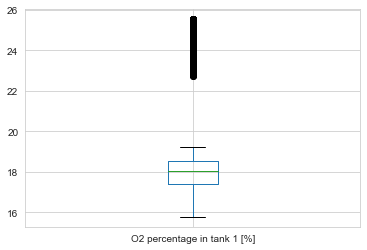

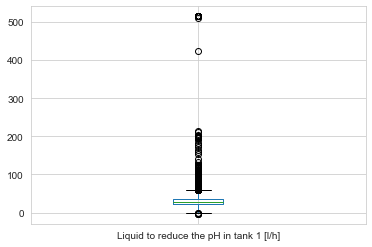

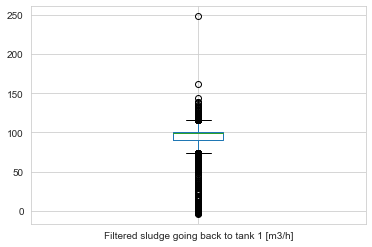

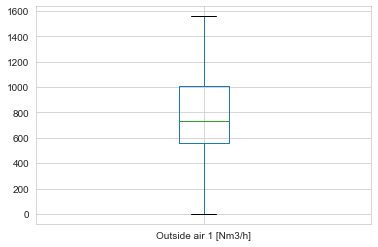

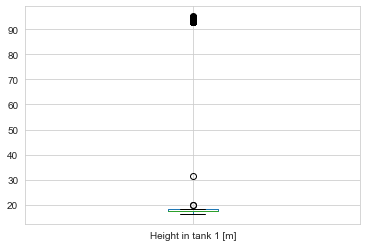

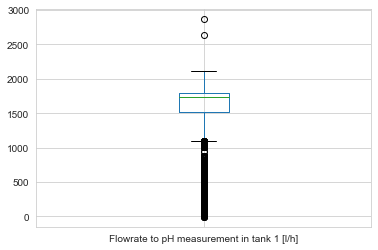

C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


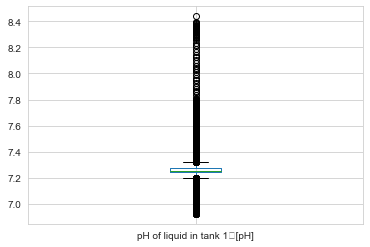

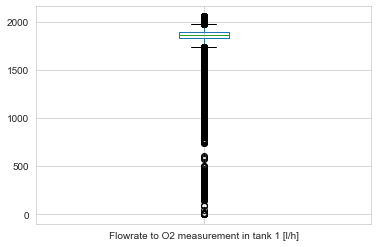

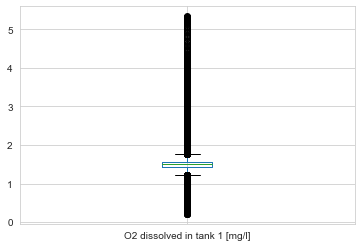

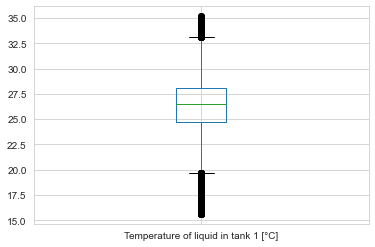

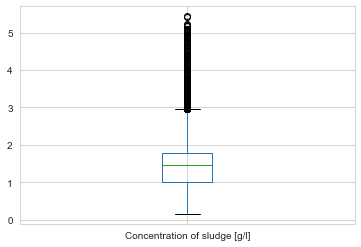

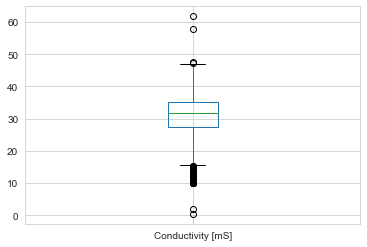

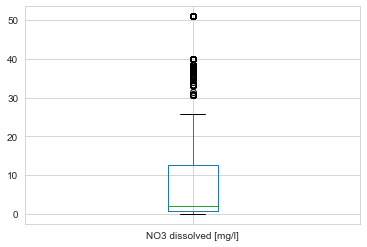

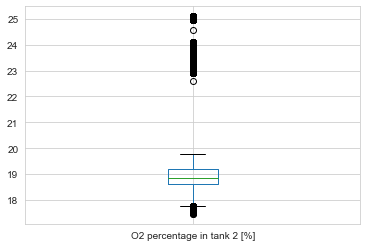

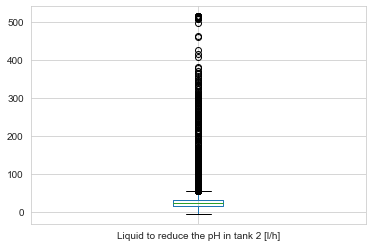

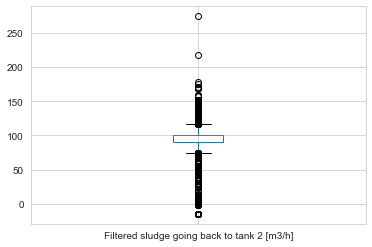

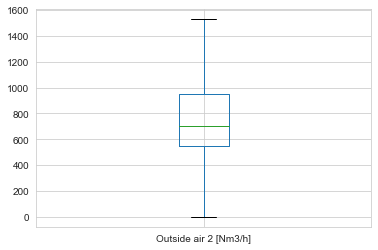

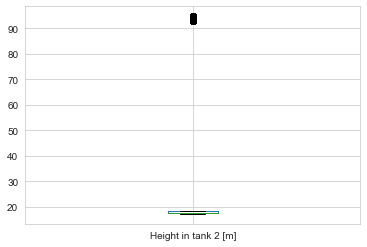

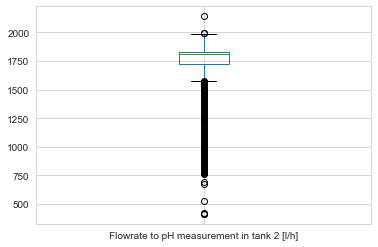

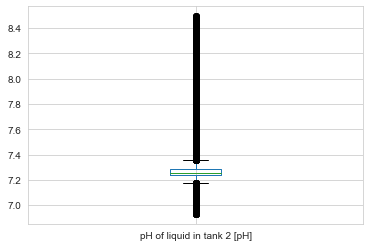

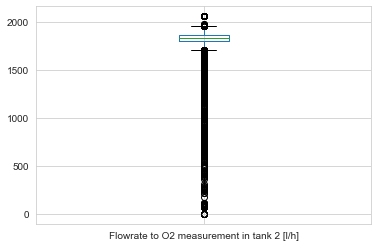

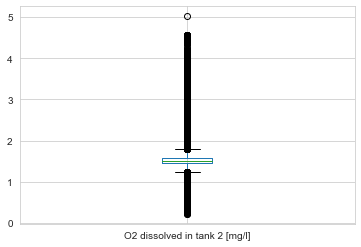

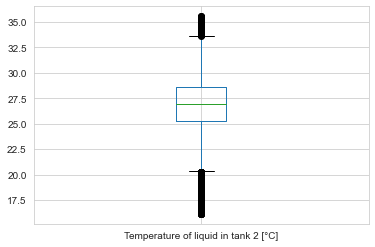

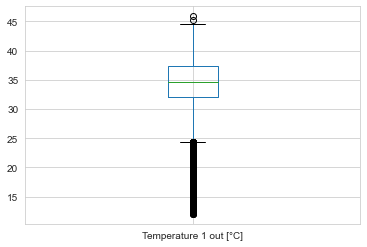

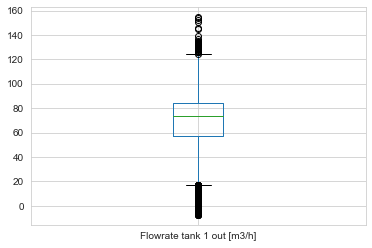

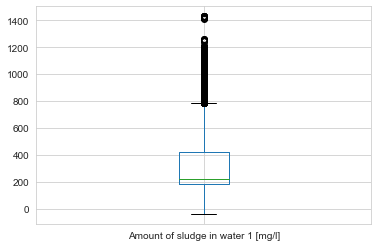

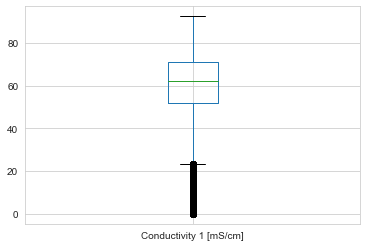

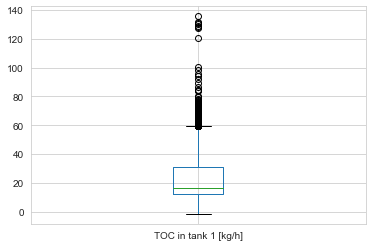

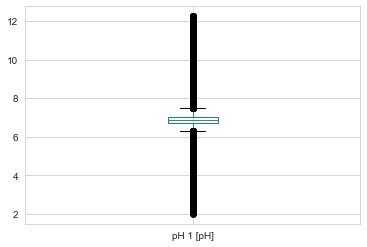

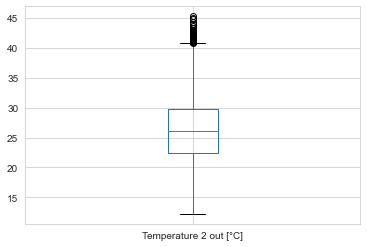

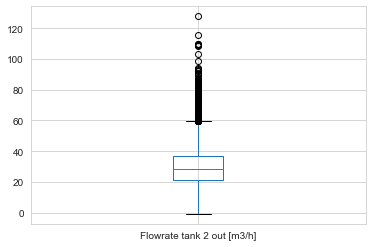

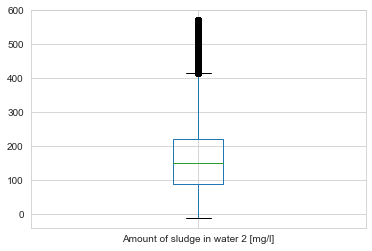

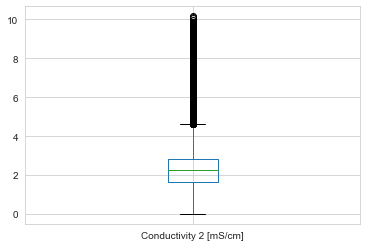

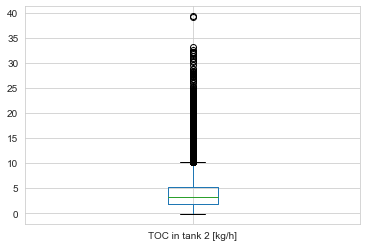

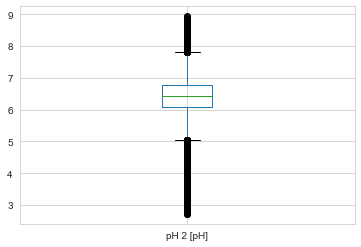

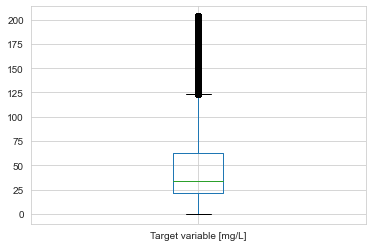

In [12]:
for column in df:
    plt.figure()
    df.boxplot([column])

Columns with negative minimum values are:
- Acid to reduce pH in tank 1
- Filtered sludge going back to tank 1
- Acid to reduce pH in tank 2
- Filtered sludge going back to tank 2
- Flowrate to O2 measurement in tank 2
- Flowrate tank 1 out [m3/h]
- Flowrate tank 1 out [kg/h]
- Flowrate tank 2 out [m3/h]
- Flowrate tank 2 out [kg/h]

These negative values will be removed with other outliers.
Columns with low std in relation to the mean are:
- O2 percentage in tank 1
- Height tank 1
- ph liquid tank 1
- O2 dissolved in tank 1
- O2 percentage in tank 2
- Height tank 2

Since the datatype of all columns is correct, no regex replacement are needed.
However the following conversion need to be removed due to being unrealistic :
- all variables with a value < = 0
- Tank 1 content height > 25m
- Tank 2 content height > 25m
- Tank 1 sludge recycle flow  > 150m3/h
- Tank 2 sludge recycle flow  > 200m3/h


In [13]:
clean_data = df.copy()
# Remove rows where at least one variable is negative or zero
clean_data = clean_data.loc[~(clean_data <= 0).any(axis=1)]
print(f"Removing rows with at least one nonpositive variable: {df.shape[0] - clean_data.shape[0]} rows were removed. ")

# Handle the tank1 content height outliers:
remove = (clean_data['Height in tank 1 [m]'] > 25)
clean_data.loc[remove] = np.nan
print(f"Setting values with Tank 1 Content height > 25m to NaN: {remove.sum()} observations were affected.")

# Handle the tank2 content height outliers:
remove = (clean_data['Height in tank 2 [m]'] > 25)
clean_data.loc[remove] = np.nan
print(f"Setting values with Tank 2 Content height > 25m to NaN: {remove.sum()} observations were affected.")

# Handle the Tank1 Sludge Recycle In Flow outliers:
remove = (clean_data['Filtered sludge going back to tank 1 [m3/h]'] > 150)
clean_data.loc[remove] = np.nan
print(f"Setting values with Tank 1 Sludge recycle in flow > 150m to NaN: {remove.sum()} observations were affected.")

# Handle the Tank2 Sludge Recycle In Flow outliers:
remove = (clean_data['Filtered sludge going back to tank 2 [m3/h]'] > 200)
clean_data.loc[remove] = np.nan
print(f"Setting values with Tank 2 Sludge recycle in flow > 200m to NaN: {remove.sum()} observations were affected.")

Removing rows with at least one nonpositive variable: 7346 rows were removed. 
Setting values with Tank 1 Content height > 25m to NaN: 7893 observations were affected.
Setting values with Tank 2 Content height > 25m to NaN: 5132 observations were affected.
Setting values with Tank 1 Sludge recycle in flow > 150m to NaN: 1 observations were affected.
Setting values with Tank 2 Sludge recycle in flow > 200m to NaN: 0 observations were affected.


We remove the following variables due to the following reasons:
* `NO3 Dissolved` - Not enough data (56 % of values are missing)
* `Tank2 O2 measurement FR` - Not relevant to the process
* `Tank1 O2 measurement FR` - Not relevant to the process
* `Tank2 pH measurement FR` - Not relevant to the process
* `Tank1 pH measurement FR` - Not relevant to the process

In [14]:
remove_vars = ['NO3 dissolved [mg/l]', 'Flowrate to pH measurement in tank 1 [l/h]',
               'Flowrate to O2 measurement in tank 1 [l/h]', 'Flowrate to pH measurement in tank 2 [l/h]',
               'Flowrate to O2 measurement in tank 2 [l/h]']
clean_data = clean_data.drop(remove_vars, axis=1)
clean_data.shape

(69128, 31)

From the initial 76474 rows, 69128 remain.

The following code block interpolates gaps of missing values. Gaps of NaN values smaller than 120 minutes will be interpolated.

Each timestamp in our dataset is 5 minutes apart. Therefore 120 minutes will correspond to 24 timesteps.

We use simple linear interpolation to fill these small gaps. This linear approximation is chosen because the gaps are relatively small.

In [15]:
max_timestamp_gap = 24 # 120 Minutes
clean_data = clean_data.interpolate('linear', axis=0, limit=max_timestamp_gap)

# # Re-make the grouped_data and group-names
# grouped_data =clean_data.groupby(level=1, axis=1)
# # Unique group names, sorted
# group_names = sorted(grouped_data.groups.keys(), key=str.casefold)

In [16]:
clean_data.isna().sum()

O2 percentage in tank 1 [%]                    16174
Liquid to reduce the pH in tank 1 [l/h]        17287
Filtered sludge going back to tank 1 [m3/h]    17173
Outside air 1 [Nm3/h]                          12994
Height in tank 1 [m]                           21355
pH of liquid in tank 1\t[pH]                   17305
O2 dissolved in tank 1 [mg/l]                  17316
Temperature of liquid in tank 1 [°C]           17361
Concentration of sludge [g/l]                  17267
Conductivity [mS]                              13808
O2 percentage in tank 2 [%]                    16193
Liquid to reduce the pH in tank 2 [l/h]        17134
Filtered sludge going back to tank 2 [m3/h]    17149
Outside air 2 [Nm3/h]                          12987
Height in tank 2 [m]                           22296
pH of liquid in tank 2 [pH]                    17173
O2 dissolved in tank 2 [mg/l]                  13642
Temperature of liquid in tank 2 [°C]           17282
Temperature 1 out [°C]                        

We see that there are a lot of N/A values.  Filling missing values can be done by several approaches:
* Simply remove any row of data with N/A values.  This is the simplest method, but as we see the number of samples would be drastically reduced.
* Replcaing missing values with the mean of existing values.  This is a simplistic approach and can only be done when there is proof that this is a good approach.  We will see later on that values from tank 1 can be filled with values from tank 2 and vice versa since both tanks have similar behaviour with regards to their features.
* More advanced techniques : k-nearest neighbour (KNN) and Multivariate Imputation by Chained Equations (MICE).

In [17]:
clean_data.shape

(69128, 31)

# General statistics
Function describe() is used to get general statistics.
Mode is not included but since values are all continous and no intervals have been specified (yet) mode is not of interest.

In [18]:
clean_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
O2 percentage in tank 1 [%],52954.0,19.140458,3.010049,15.776370,17.340715,17.976595,18.438650,25.530860
Liquid to reduce the pH in tank 1 [l/h],51841.0,29.140679,12.282688,0.002964,21.281730,28.438780,36.275300,215.343300
Filtered sludge going back to tank 1 [m3/h],51955.0,92.642979,13.344533,0.024883,84.914205,97.997470,100.053700,139.542200
Outside air 1 [Nm3/h],56134.0,755.486472,283.659002,17.805880,560.061925,707.616200,905.989475,1557.484000
Height in tank 1 [m],47773.0,17.606457,0.363414,17.067740,17.364720,17.446180,17.643250,18.415400
pH of liquid in tank 1\t[pH],51823.0,7.303938,0.108711,6.923481,7.246688,7.255001,7.283416,8.385586
O2 dissolved in tank 1 [mg/l],51812.0,1.509637,0.281291,0.212584,1.435472,1.503904,1.574254,5.339407
Temperature of liquid in tank 1 [°C],51767.0,26.398628,3.185675,15.622140,24.736125,26.534830,28.187445,35.171540
Concentration of sludge [g/l],51861.0,1.365482,0.533869,0.421992,0.985908,1.199537,1.580091,5.434918
Conductivity [mS],55320.0,30.767791,5.888399,0.388115,27.019202,31.852625,35.192720,61.798830


In [19]:
cols=['Liquid to reduce the pH in tank 1 [l/h]',
      'Filtered sludge going back to tank 1 [m3/h]',
      'Liquid to reduce the pH in tank 2 [l/h]',
      'Filtered sludge going back to tank 2 [m3/h]',
      'Flowrate to O2 measurement in tank 2 [l/h]',
      'Flowrate tank 1 out [m3/h]',
      'Flowrate tank 1 out [kg/h]',
      'Flowrate tank 2 out [m3/h]',
      'Flowrate tank 2 out [kg/h]']


# Outliers
Check if there are values that are unusually high or low.
However taking 1.5 * IQR to much information is lossed so this action will be ignored.

In [20]:
# Q1 = clean_data.quantile(0.25)
# Q3 = clean_data.quantile(0.75)
# IQR = Q3 - Q1
#
# df = clean_data[~((clean_data < (Q1 - 1.5 * IQR)) |(clean_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
clean_data.shape

(69128, 31)

# Distributions
Check the distribution of values per column.  Is there a normal distribution, is the distribution skewed or is there no clear distribution of values at all.

C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


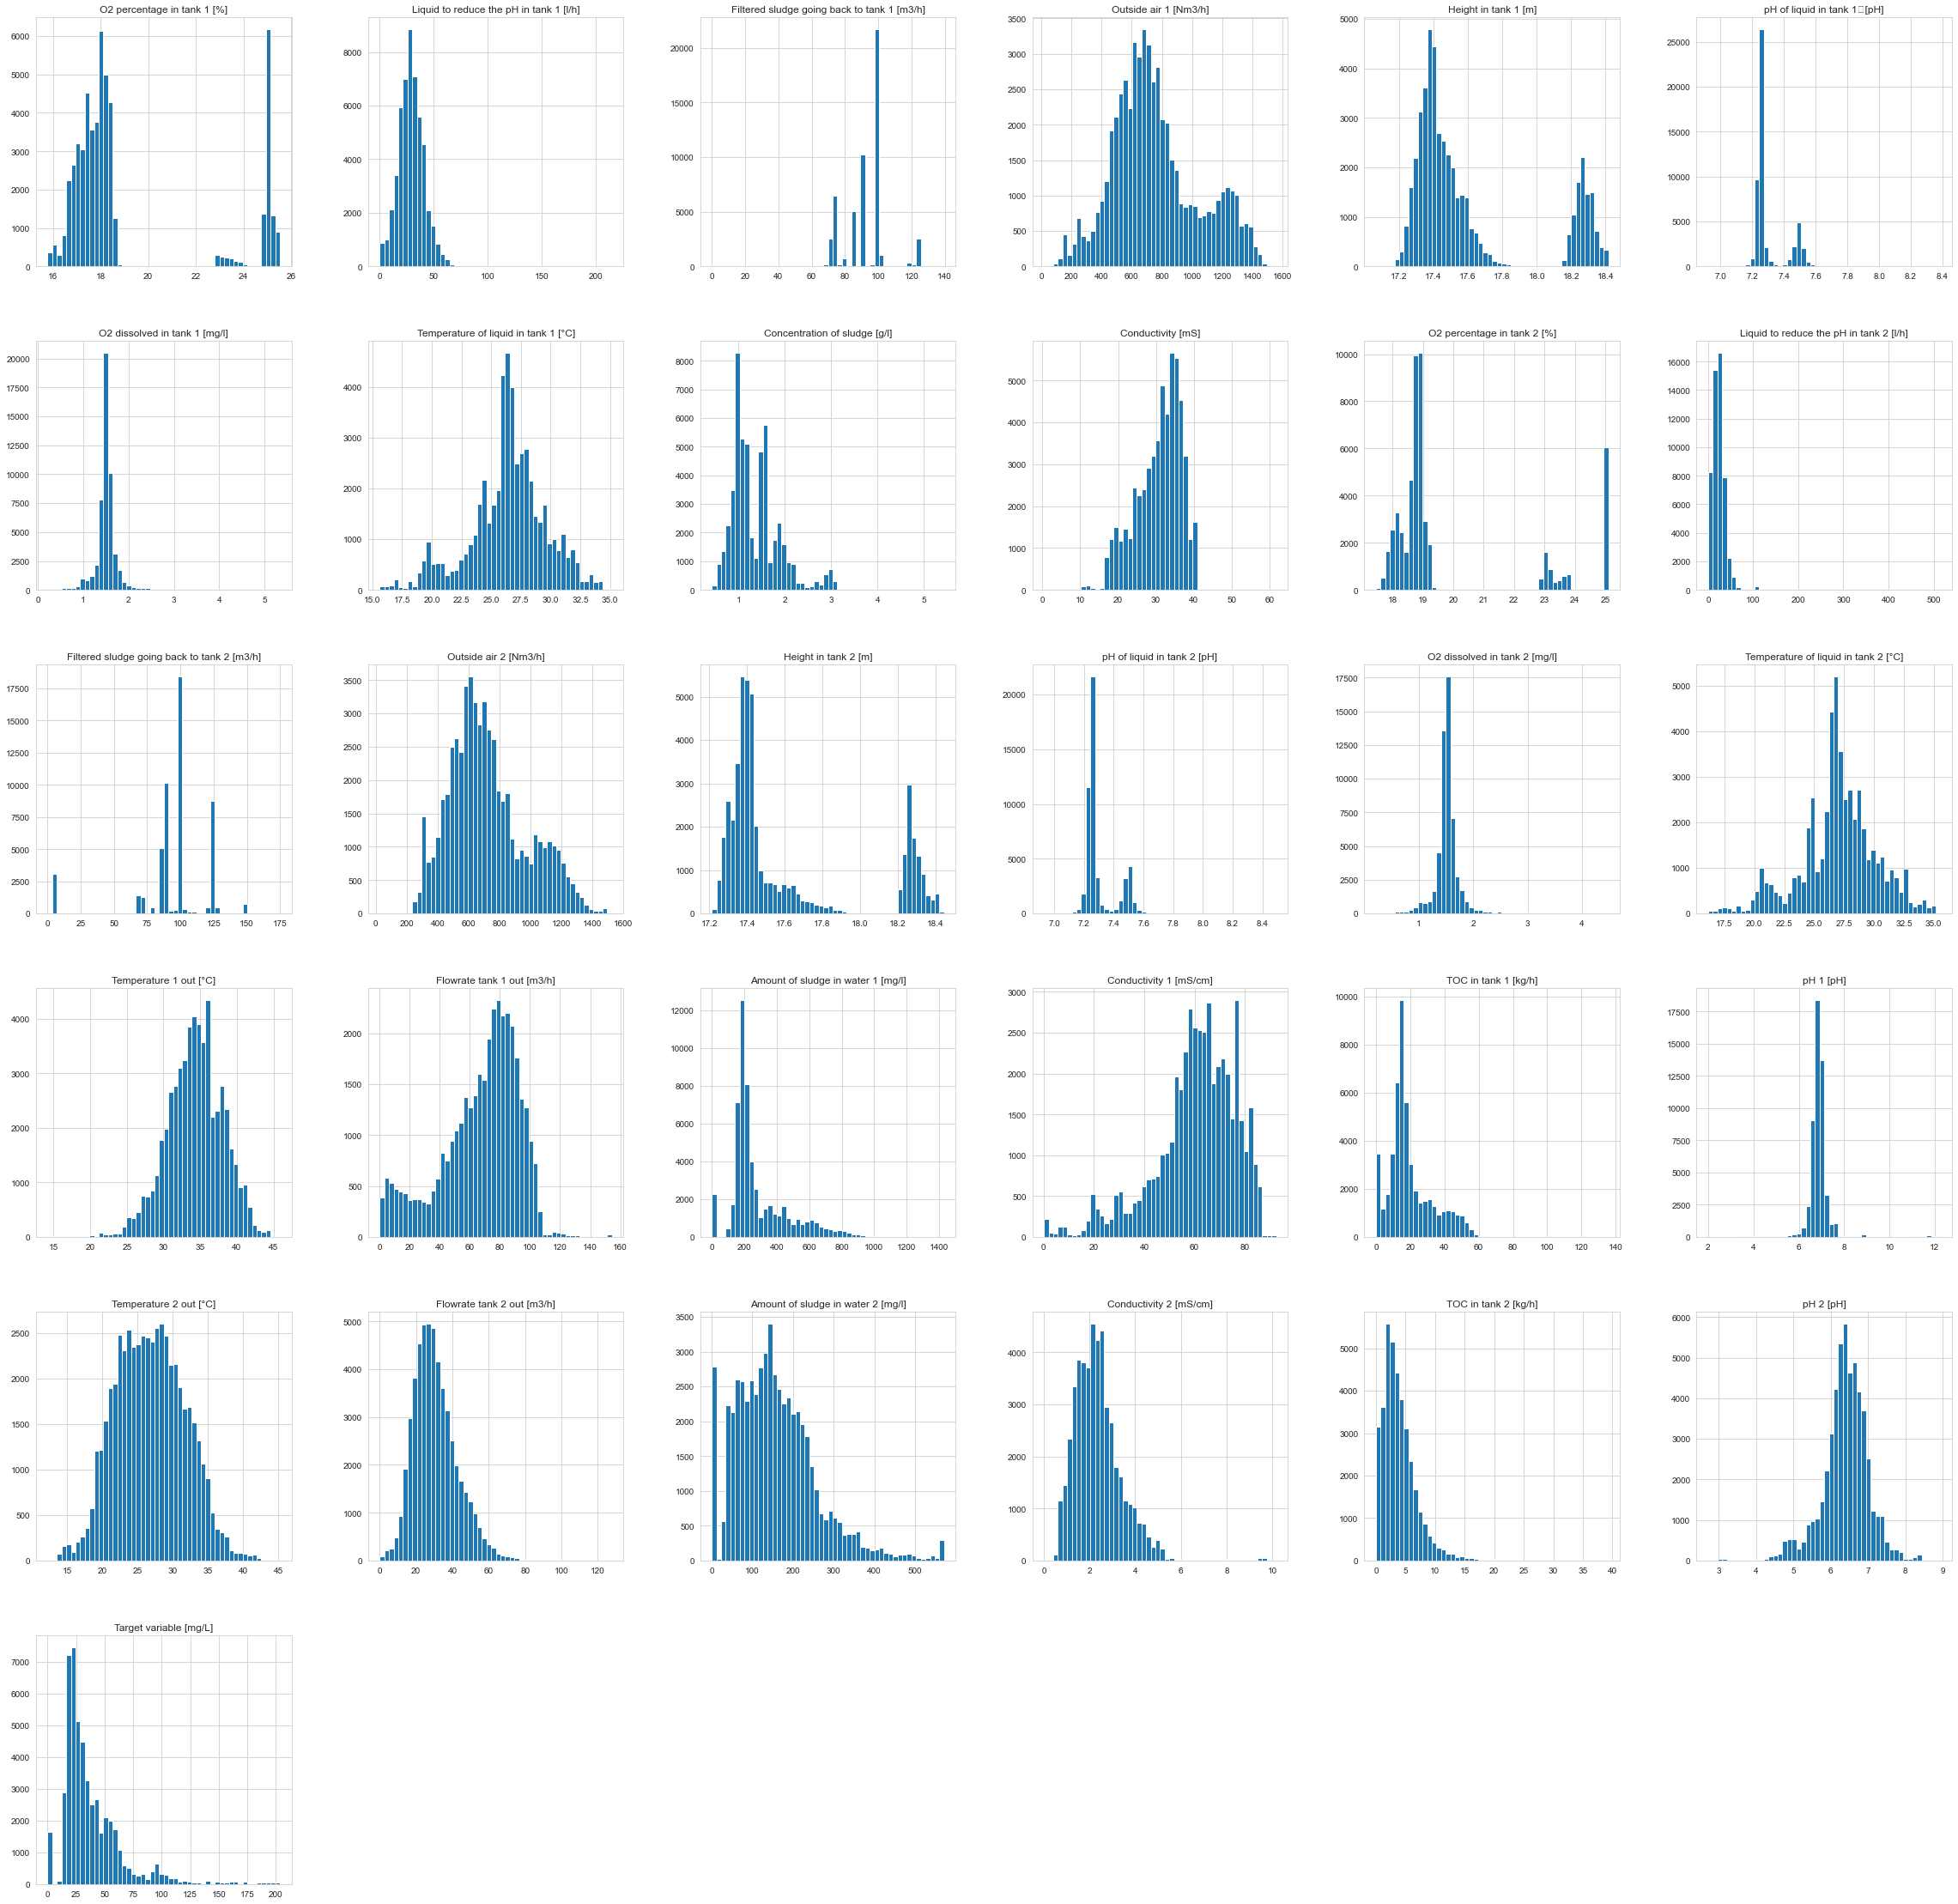

In [22]:
clean_data.hist(bins=50,figsize=(40,40))
plt.show()

Features that follow a +- normal distribution, indicating that feature is usually stable :
- liquid to reduce pH in tank 1 & 2
- filtered sludge back to tank 1 & 2
- outside air tank 1 & 2
- pH of liquid in tank 1 & 2  --> logical since the acid to tank 1 & 2 to keep pH is also quite stable and they are directly correlated
- O2 dissolved in tank 1 & 2  --> related to outside air tank 1 & 2 to aerate the liquid and the temperature of the water.  Only a certain amount of O2 can be dissolved at a certain temperature in water
- Flow tank 1 & 2 out
- Target is normally distributed but heavy tailed.

Feature that are not clearly distributed:
- Flowrate to pH measurement.  Probably a bypass stream to pH analyzer vessel, perhaps intermittent stream.  This is not relevant for the target.
- conductivity is a measure of amount of ions in the water to conduct electricity. Therefor it indicates the amount of dissolved solids (salts) in mg/l.  The conductivity is also impacted by temperature so there is an influence of day/night and weather.
- height of tank 1 and 2 have 2 distinct peaks indicating there are 2 operation modes.

### Making some cuts in the data

* We remove the observations where `Target` is missing, because we cannot do anything with these rows.
* We remove rows (observations) that have to many missing variables at the same time. The following plot displays the percentage of NaN variables per timestamp (row)

In [23]:
mask = clean_data['Target variable [mg/L]'].isna()
clean_data = clean_data.loc[~mask]

print(f'{mask.sum()} timestamps of the Target variable are missing. These full rows are removed. {clean_data.shape[0]} rows remain.')

threshold = .4 # 40% missing variables in one timestamp

missings = clean_data.isna().sum(axis=1) / clean_data.shape[1]

clean_data = clean_data.loc[missings < threshold]
print(f'{(missings >= threshold).sum()} rows had more missing values than the threshold. {clean_data.shape[0]} rows remain.')

# # Re-make the grouped_data and group-names
# grouped_data =clean_data.groupby(level=1, axis=1)
# # Unique group names, sorted
# group_names = sorted(grouped_data.groups.keys(), key=str.casefold)

17851 timestamps of the Target variable are missing. These full rows are removed. 51277 rows remain.
4246 rows had more missing values than the threshold. 47031 rows remain.


Saving the clean data to a separate file on disk.

In [24]:
clean_data.to_csv("./Biology case - Cleaned Data.csv")

# Time series analysis
First plot the different feature.  I separated the values for tank 1 & 2.
Over 1 month period no seasonality can be seen in any variable.

C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


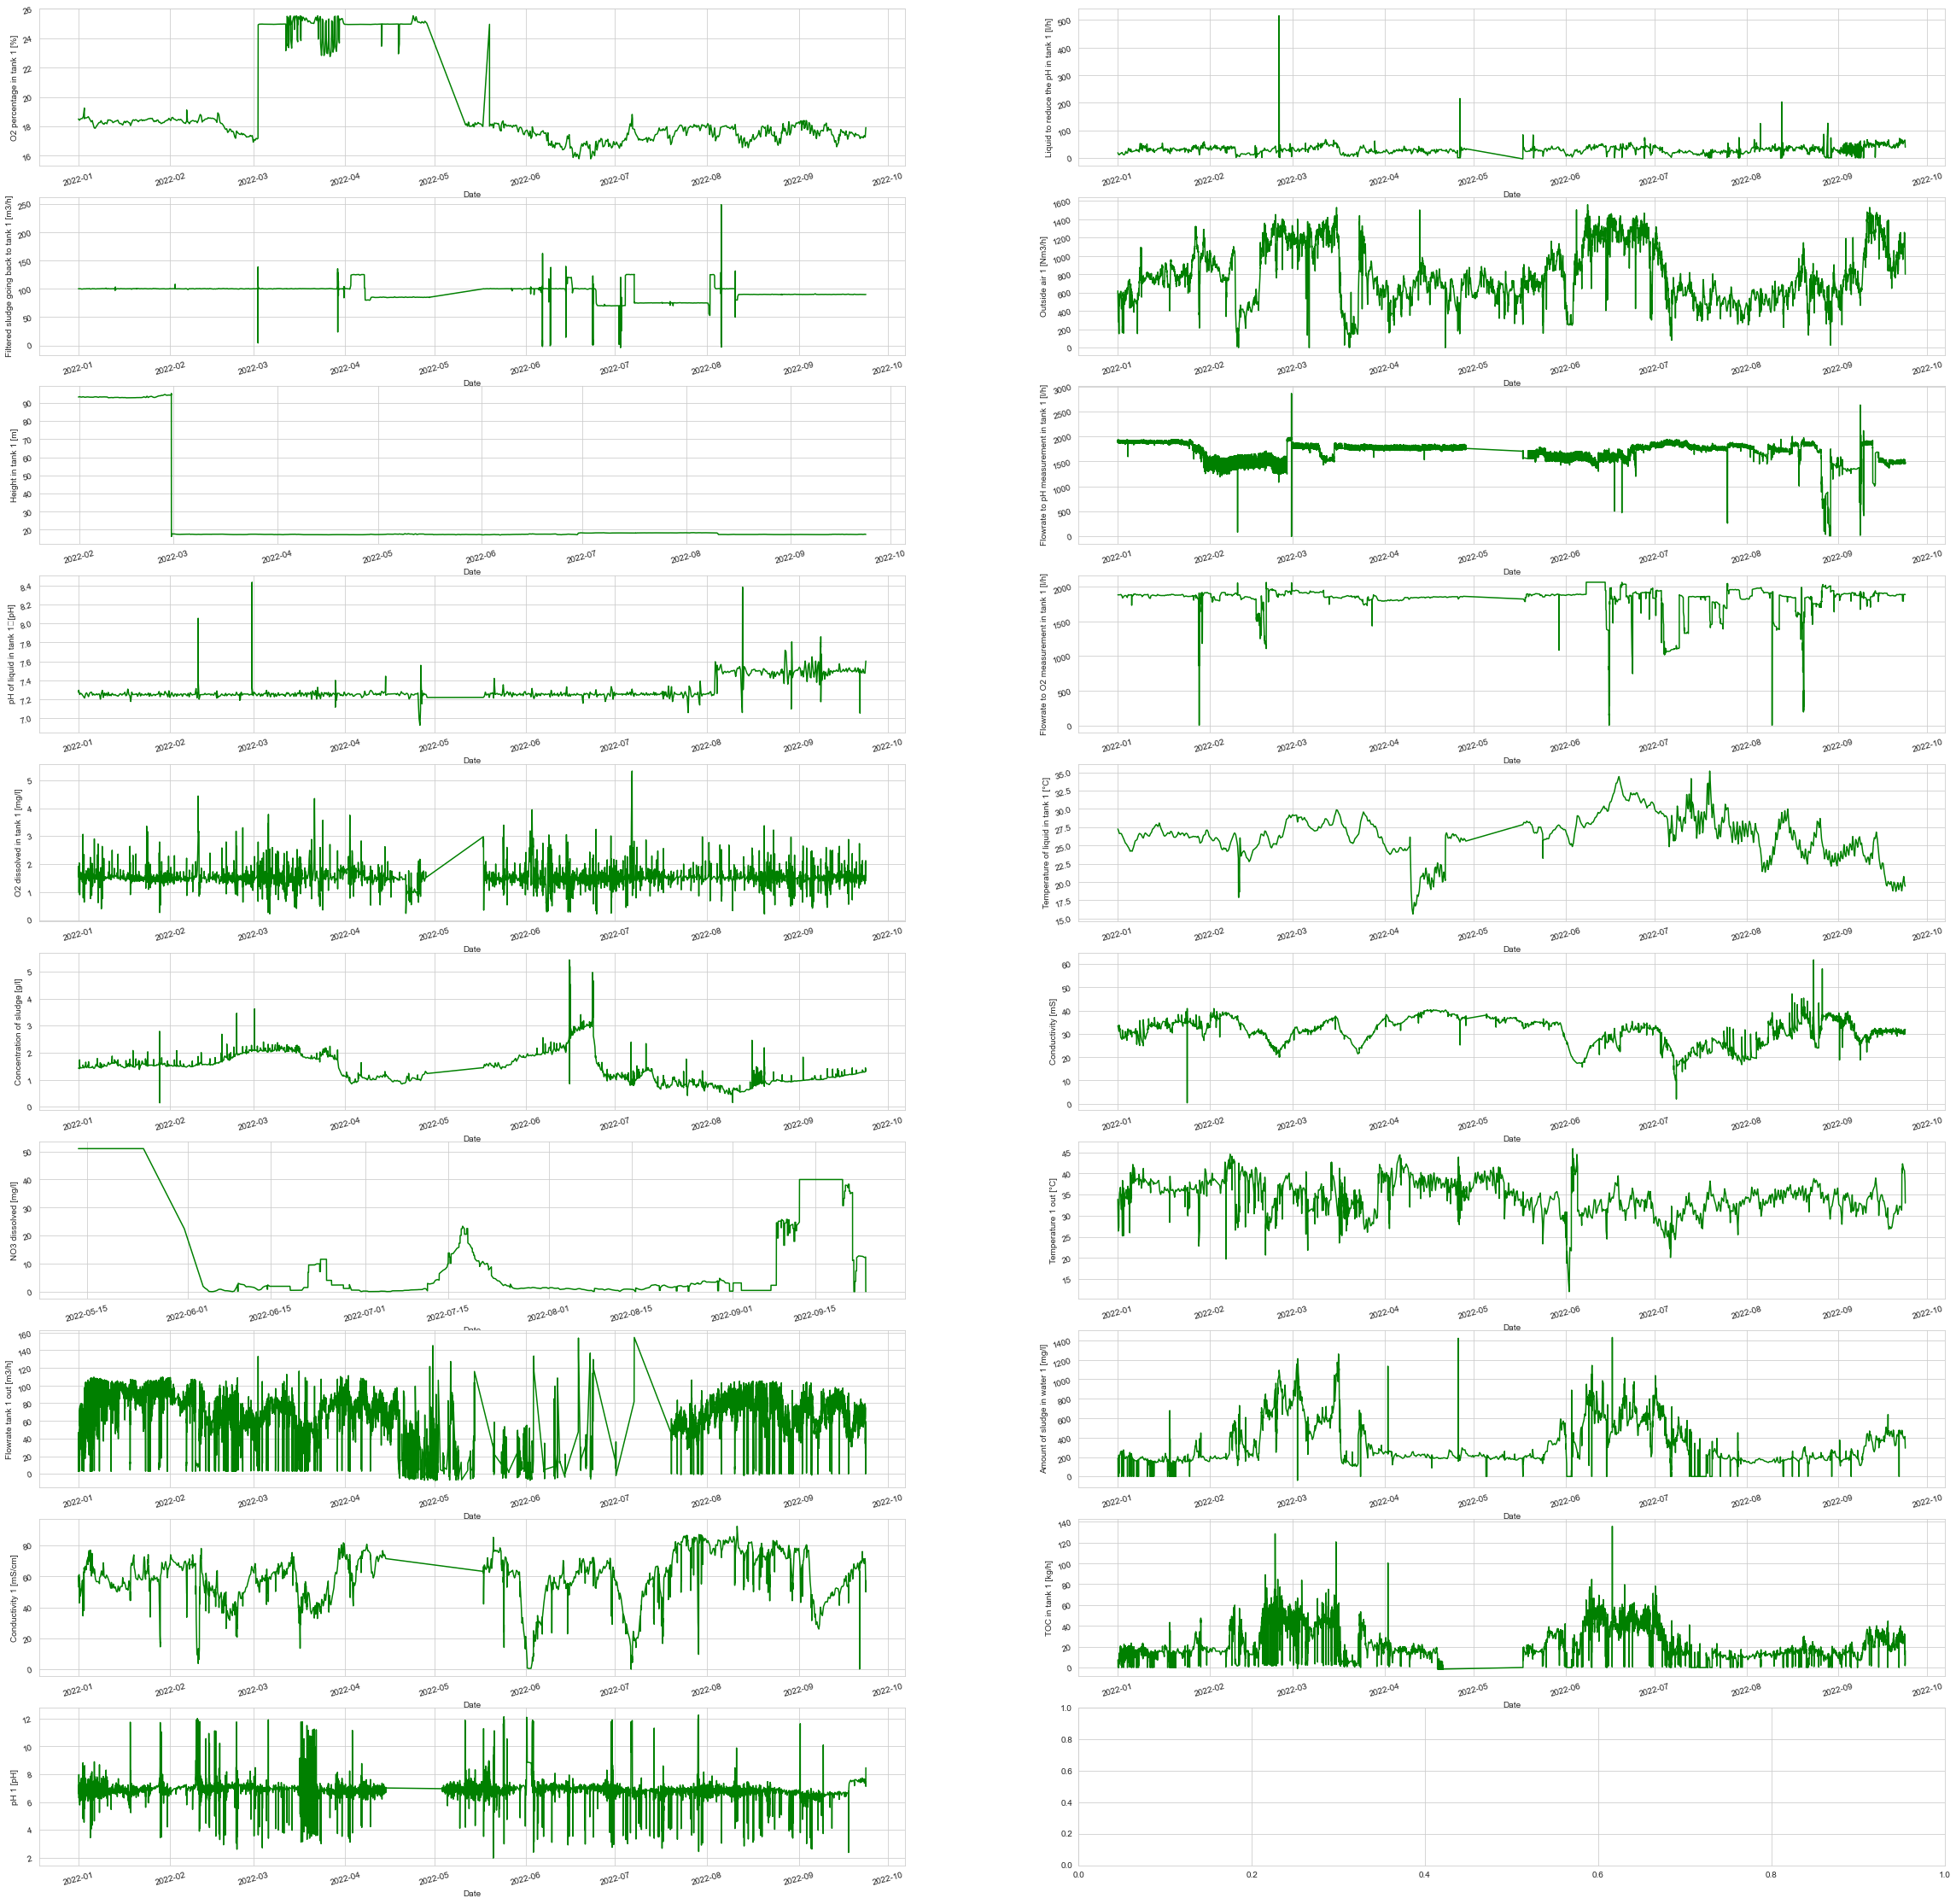

In [25]:
fig, ax = plt.subplots(10,2, figsize=(40,40))

sns.lineplot(x="Date", y="O2 percentage in tank 1 [%]", color='g', data=df,ax=ax[0][0])
ax[0][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Liquid to reduce the pH in tank 1 [l/h]", color='g', data=df,ax=ax[0][1])
ax[0][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Filtered sludge going back to tank 1 [m3/h]", color='g', data=df,ax=ax[1][0])
ax[1][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Outside air 1 [Nm3/h]", color='g', data=df,ax=ax[1][1])
ax[1][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Height in tank 1 [m]", color='g', data=df,ax=ax[2][0])
ax[2][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Flowrate to pH measurement in tank 1 [l/h]", color='g', data=df,ax=ax[2][1])
ax[2][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="pH of liquid in tank 1	[pH]", color='g', data=df,ax=ax[3][0])
ax[3][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Flowrate to O2 measurement in tank 1 [l/h]", color='g', data=df,ax=ax[3][1])
ax[3][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="O2 dissolved in tank 1 [mg/l]", color='g', data=df,ax=ax[4][0])
ax[4][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Temperature of liquid in tank 1 [°C]", color='g', data=df,ax=ax[4][1])
ax[4][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Concentration of sludge [g/l]", color='g', data=df,ax=ax[5][0])
ax[5][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Conductivity [mS]", color='g', data=df,ax=ax[5][1])
ax[5][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="NO3 dissolved [mg/l]", color='g', data=df,ax=ax[6][0])
ax[6][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Temperature 1 out [°C]", color='g', data=df,ax=ax[6][1])
ax[6][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Flowrate tank 1 out [m3/h]", color='g', data=df,ax=ax[7][0])
ax[7][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Amount of sludge in water 1 [mg/l]", color='g', data=df,ax=ax[7][1])
ax[7][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Conductivity 1 [mS/cm]", color='g', data=df,ax=ax[8][0])
ax[8][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="TOC in tank 1 [kg/h]", color='g', data=df,ax=ax[8][1])
ax[8][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="pH 1 [pH]", color='g', data=df,ax=ax[9][0])
ax[9][0].tick_params(labelrotation=15)

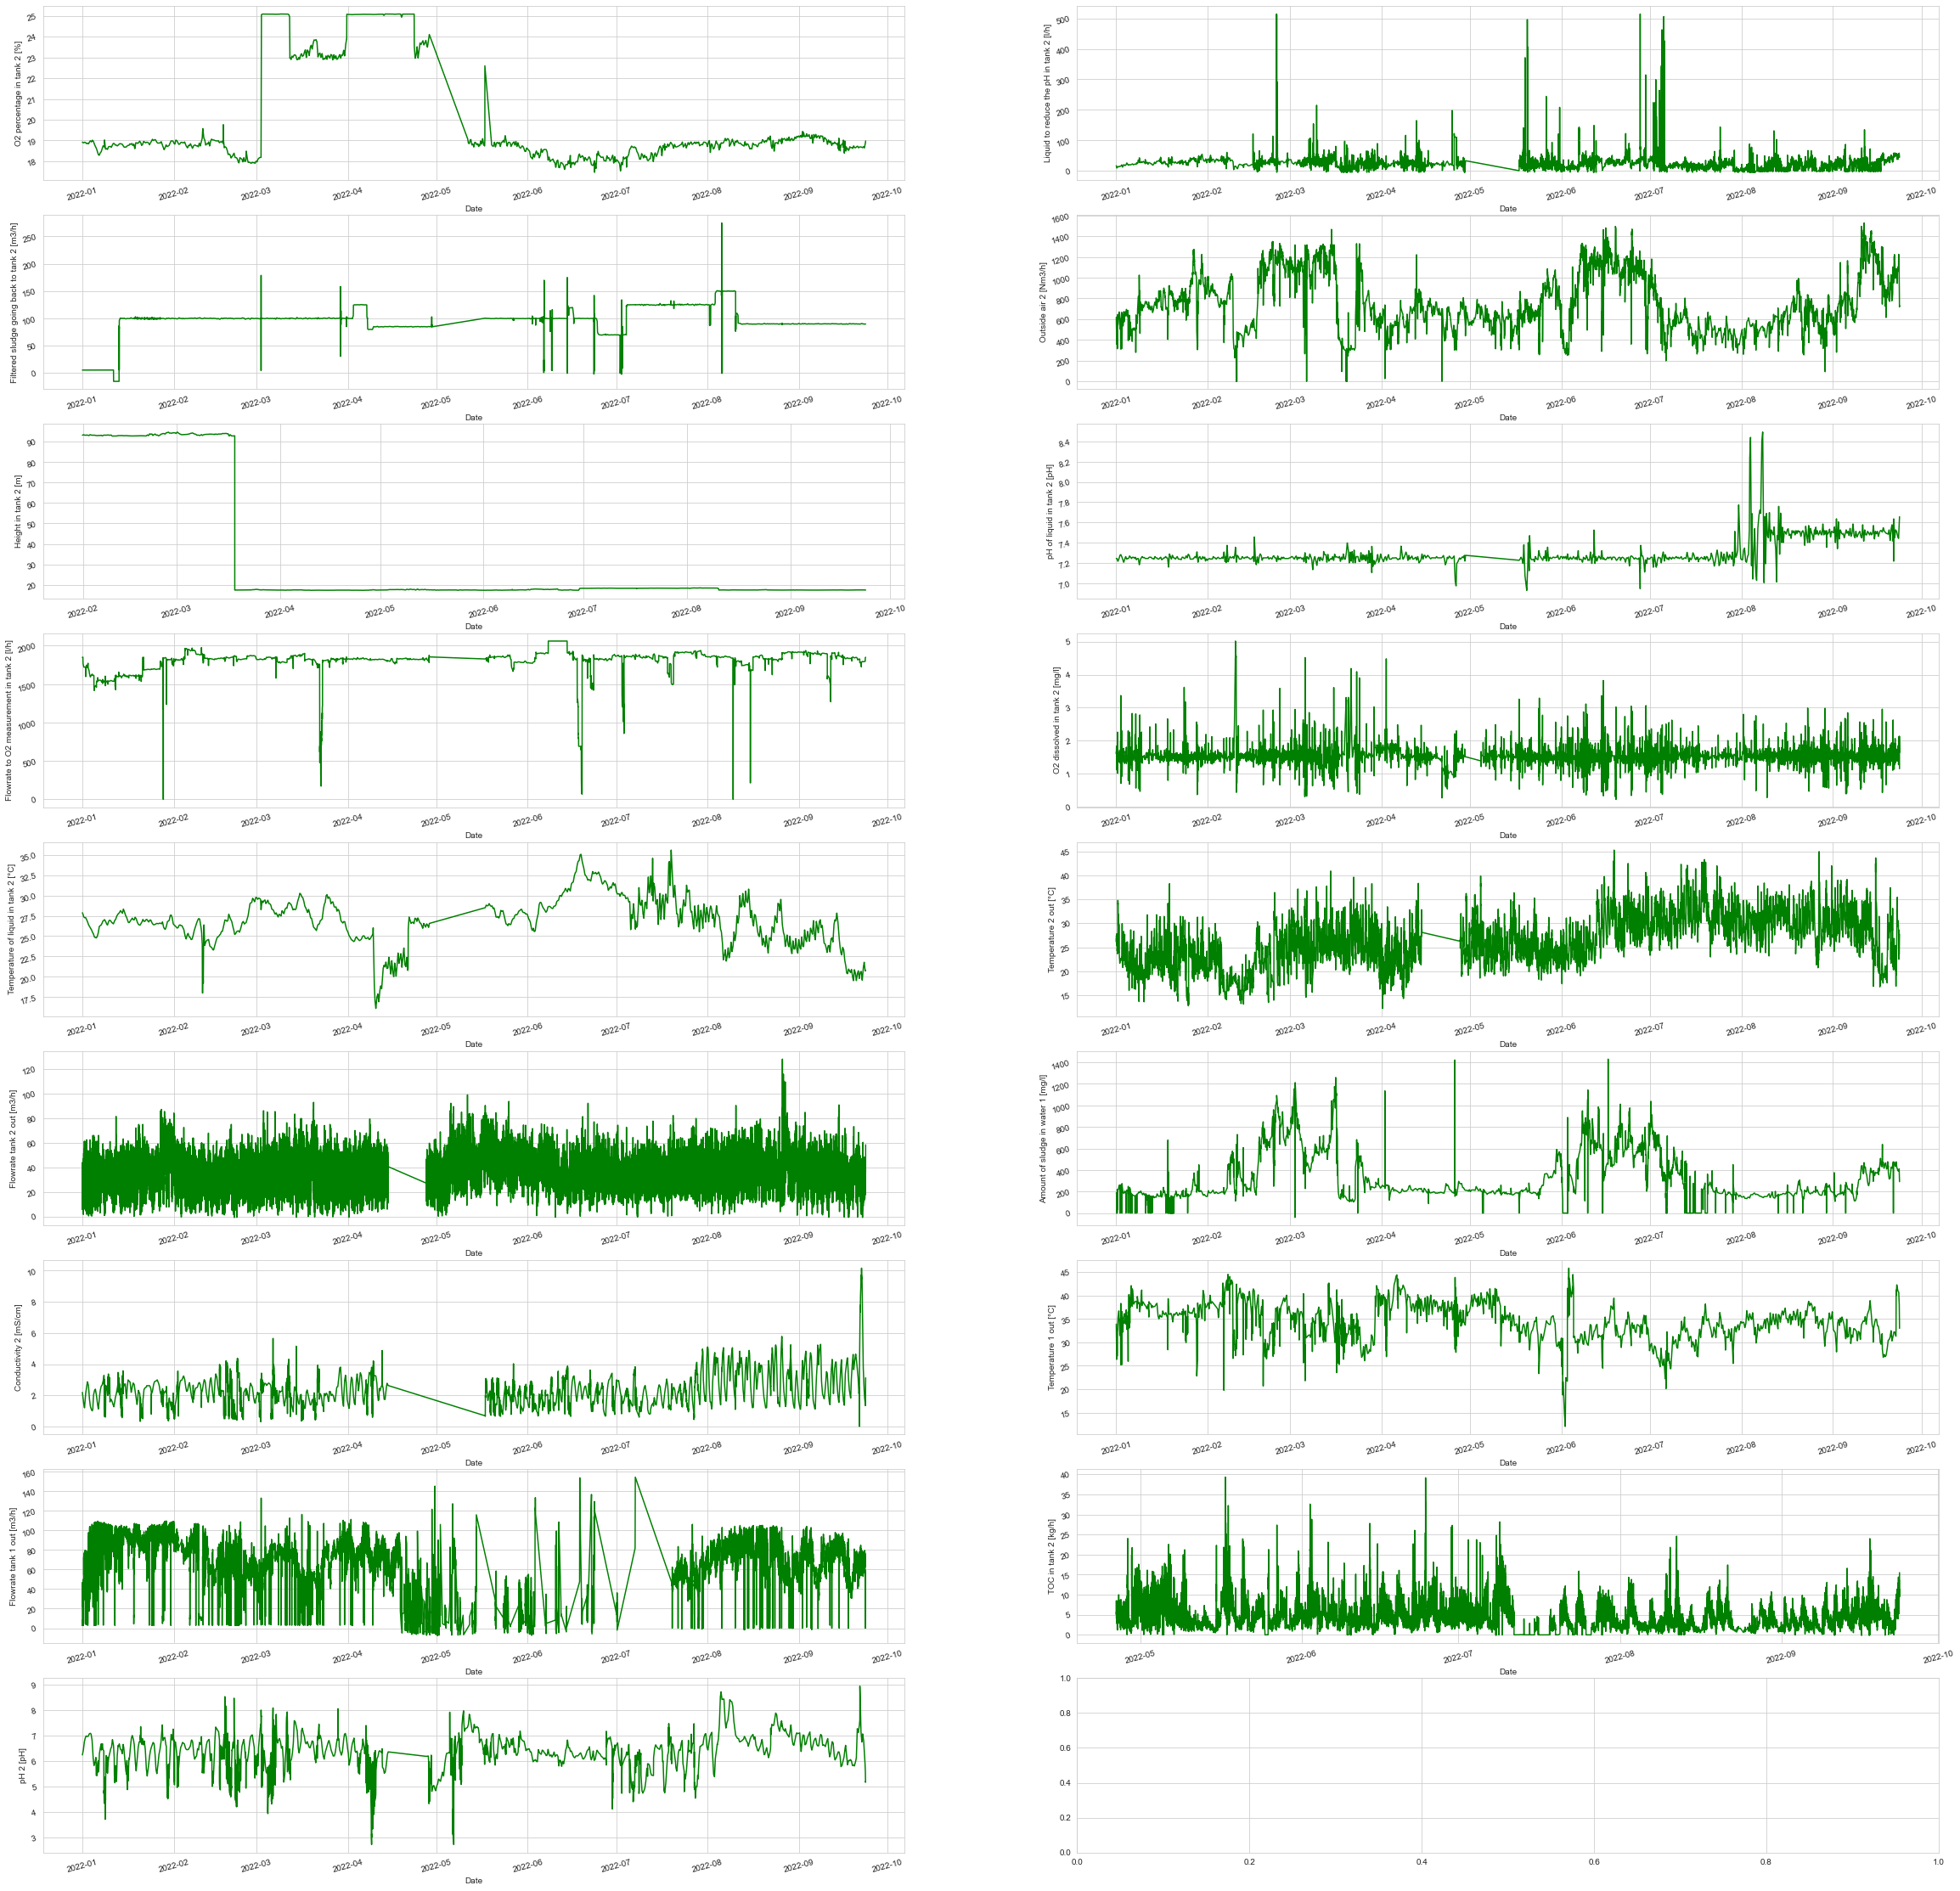

In [26]:
fig, ax = plt.subplots(9,2, figsize=(40,40))

sns.lineplot(x="Date", y="O2 percentage in tank 2 [%]", color='g', data=df,ax=ax[0][0])
ax[0][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Liquid to reduce the pH in tank 2 [l/h]", color='g', data=df,ax=ax[0][1])
ax[0][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Filtered sludge going back to tank 2 [m3/h]", color='g', data=df,ax=ax[1][0])
ax[1][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Outside air 2 [Nm3/h]", color='g', data=df,ax=ax[1][1])
ax[1][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Height in tank 2 [m]", color='g', data=df,ax=ax[2][0])
ax[2][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="pH of liquid in tank 2 [pH]", color='g', data=df,ax=ax[2][1])
ax[2][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Flowrate to O2 measurement in tank 2 [l/h]", color='g', data=df,ax=ax[3][0])
ax[3][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="O2 dissolved in tank 2 [mg/l]", color='g', data=df,ax=ax[3][1])
ax[3][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Temperature of liquid in tank 2 [°C]", color='g', data=df,ax=ax[4][0])
ax[4][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Temperature 2 out [°C]", color='g', data=df,ax=ax[4][1])
ax[4][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Flowrate tank 2 out [m3/h]", color='g', data=df,ax=ax[5][0])
ax[5][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Amount of sludge in water 1 [mg/l]", color='g', data=df,ax=ax[5][1])
ax[5][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Conductivity 2 [mS/cm]", color='g', data=df,ax=ax[6][0])
ax[6][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Temperature 1 out [°C]", color='g', data=df,ax=ax[6][1])
ax[6][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="Flowrate tank 1 out [m3/h]", color='g', data=df,ax=ax[7][0])
ax[7][0].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="TOC in tank 2 [kg/h]", color='g', data=df,ax=ax[7][1])
ax[7][1].tick_params(labelrotation=15)

sns.lineplot(x="Date", y="pH 2 [pH]", color='g', data=df,ax=ax[8][0])
ax[8][0].tick_params(labelrotation=15)

# Linear correlations
First we perform a pair plot if there is any correlation to be seen visually.

In [27]:
# sns.pairplot(df)

Use of a heatmap to indicate (pearson) correlation between each variable.
Correlation of each variable with the target.  All values below 0.8 are set to zero for easy readability.

C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


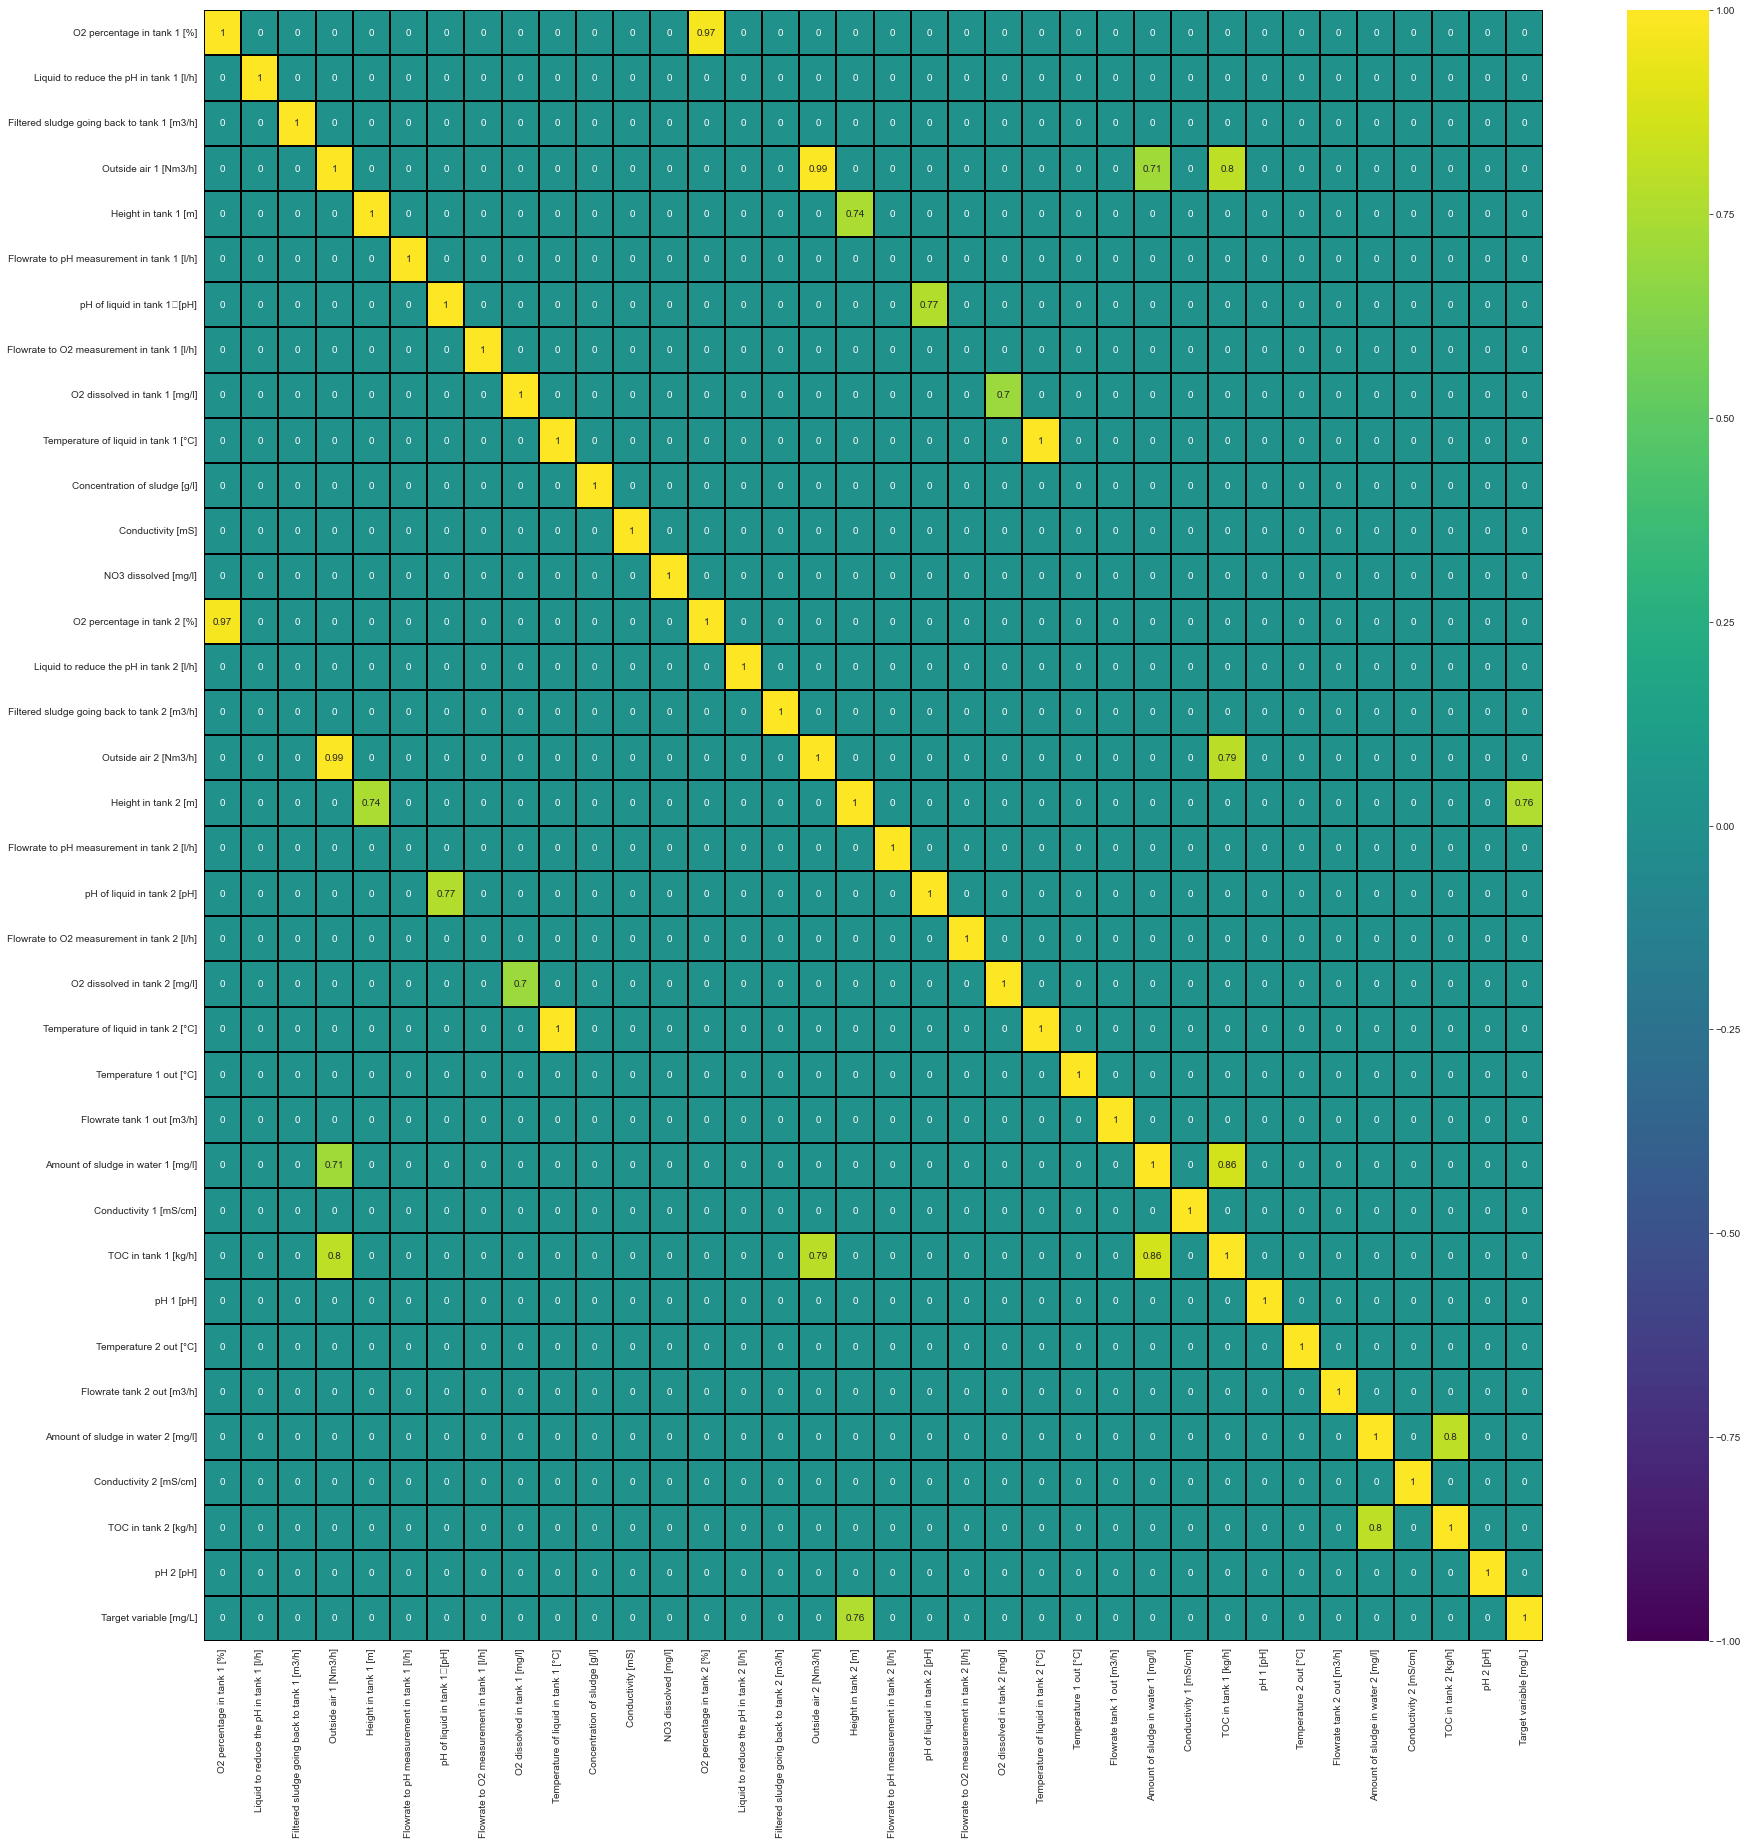

In [28]:
corr = df.corr()
corr[np.abs(corr)<.7] = 0
plt.figure(figsize=(30,30))
sns.heatmap(corr,
            linewidths=2,
            linecolor='black',
            vmin=-1,
            vmax=1,
            cmap='viridis',
            annot=True);

correlation :
- TOC input is the amount of contamination in the water stream in kg/h.  The more TOC's are introduced into tank 1 or 2, the more sludge is produced by the WWT bacteria.

Besides that no other linear correlation was found, also not with the target.
Off course variables going in or split before the 2 tanks, correlate to one another.

# Filling Missing values

Before any feature engineering can be performed, the missing values in the dataset should be removed or filled. There are different techniques to fill missing values. This section demonstrates some techniques to fill the data.

## Filling missing values in Tank 1 and Tank 2

In the data analysis, we saw that `Tank 1` and `Tank 2` had variables which were very similar (highly correlated), presumably because both tanks are connected. We can use this information to fill missing values for `Tank 1` and `Tank 2`
* If there is a value for a certain variable missing in `Tank 1`, which is present in `Tank 2`, we can fill the missing value in `Tank 1` with the valid value of `Tank 2`
* The opposite is also true

The following code cell does this, and stores the filled `Tank 1` and `Tank 2` data in the tank1 and tank2 variables respectively.

In [29]:
clean_data['O2 percentage in tank 1 [%]'].fillna(clean_data['O2 percentage in tank 2 [%]'])
clean_data['O2 percentage in tank 2 [%]'].fillna(clean_data['O2 percentage in tank 1 [%]'])

clean_data['Liquid to reduce the pH in tank 1 [l/h]'].fillna(clean_data['Liquid to reduce the pH in tank 2 [l/h]'])
clean_data['Liquid to reduce the pH in tank 2 [l/h]'].fillna(clean_data['Liquid to reduce the pH in tank 1 [l/h]'])

clean_data['Filtered sludge going back to tank 1 [m3/h]'].fillna(clean_data['Filtered sludge going back to tank 2 [m3/h]'])
clean_data['Filtered sludge going back to tank 2 [m3/h]'].fillna(clean_data['Filtered sludge going back to tank 1 [m3/h]'])

clean_data['Outside air 1 [Nm3/h]'].fillna(clean_data['Outside air 2 [Nm3/h]'])
clean_data['Outside air 2 [Nm3/h]'].fillna(clean_data['Outside air 1 [Nm3/h]'])

clean_data['Height in tank 1 [m]'].fillna(clean_data['Height in tank 2 [m]'])
clean_data['Height in tank 2 [m]'].fillna(clean_data['Height in tank 1 [m]'])

# clean_data['Flowrate to pH measurement in tank 1 [l/h]'].fillna(clean_data['Flowrate to pH measurement in tank 2 [l/h]'])
# clean_data['Flowrate to pH measurement in tank 2 [l/h]'].fillna(clean_data['Flowrate to pH measurement in tank 1 [l/h]'])

clean_data['pH of liquid in tank 1	[pH]'].fillna(clean_data['pH of liquid in tank 2 [pH]'])
clean_data['pH of liquid in tank 2 [pH]'].fillna(clean_data['pH of liquid in tank 1	[pH]'])

# clean_data['Flowrate to O2 measurement in tank 1 [l/h]'].fillna(clean_data['Flowrate to O2 measurement in tank 2 [l/h]'])
# clean_data['Flowrate to O2 measurement in tank 2 [l/h]'].fillna(clean_data['Flowrate to O2 measurement in tank 1 [l/h]'])

clean_data['O2 dissolved in tank 1 [mg/l]'].fillna(clean_data['O2 dissolved in tank 2 [mg/l]'])
clean_data['O2 dissolved in tank 2 [mg/l]'].fillna(clean_data['O2 dissolved in tank 1 [mg/l]'])

clean_data['Temperature of liquid in tank 1 [°C]'].fillna(clean_data['Temperature of liquid in tank 2 [°C]'])
clean_data['Temperature of liquid in tank 2 [°C]'].fillna(clean_data['Temperature of liquid in tank 1 [°C]'])

clean_data['O2 percentage in tank 2 [%]'].fillna(clean_data['O2 percentage in tank 1 [%]'])
clean_data['O2 percentage in tank 1 [%]'].fillna(clean_data['O2 percentage in tank 2 [%]'])

clean_data['Temperature 1 out [°C]'].fillna(clean_data['Temperature 2 out [°C]'])
clean_data['Temperature 2 out [°C]'].fillna(clean_data['Temperature 1 out [°C]'])

clean_data['Flowrate tank 1 out [m3/h]'].fillna(clean_data['Flowrate tank 2 out [m3/h]'])
clean_data['Flowrate tank 2 out [m3/h]'].fillna(clean_data['Flowrate tank 1 out [m3/h]'])

clean_data['Amount of sludge in water 1 [mg/l]'].fillna(clean_data['Amount of sludge in water 2 [mg/l]'])
clean_data['Amount of sludge in water 2 [mg/l]'].fillna(clean_data['Amount of sludge in water 1 [mg/l]'])

clean_data['Conductivity 1 [mS/cm]'].fillna(clean_data['Conductivity 2 [mS/cm]'])
clean_data['Conductivity 2 [mS/cm]'].fillna(clean_data['Conductivity 1 [mS/cm]'])

clean_data['TOC in tank 1 [kg/h]'].fillna(clean_data['TOC in tank 2 [kg/h]'])
clean_data['TOC in tank 2 [kg/h]'].fillna(clean_data['TOC in tank 1 [kg/h]'])

clean_data['pH 1 [pH]'].fillna(clean_data['pH 2 [pH]'])
clean_data['pH 2 [pH]'].fillna(clean_data['pH 1 [pH]'])

Date
2022-01-17 17:10:00    6.930508
2022-01-17 17:15:00    6.931771
2022-01-17 17:20:00    6.933034
2022-01-17 17:25:00    6.934297
2022-01-17 17:30:00    6.935560
                         ...   
2022-09-23 13:25:00    5.174101
2022-09-23 13:30:00    5.180713
2022-09-23 13:35:00    5.187325
2022-09-23 13:40:00    5.193936
2022-09-23 13:45:00    5.199961
Name: pH 2 [pH], Length: 47031, dtype: float64

In [30]:
clean_data.isna().sum()

O2 percentage in tank 1 [%]                      630
Liquid to reduce the pH in tank 1 [l/h]           20
Filtered sludge going back to tank 1 [m3/h]        0
Outside air 1 [Nm3/h]                              0
Height in tank 1 [m]                            4038
pH of liquid in tank 1\t[pH]                      20
O2 dissolved in tank 1 [mg/l]                     78
Temperature of liquid in tank 1 [°C]              76
Concentration of sludge [g/l]                     10
Conductivity [mS]                                 10
O2 percentage in tank 2 [%]                      613
Liquid to reduce the pH in tank 2 [l/h]            0
Filtered sludge going back to tank 2 [m3/h]        0
Outside air 2 [Nm3/h]                              0
Height in tank 2 [m]                            4979
pH of liquid in tank 2 [pH]                        0
O2 dissolved in tank 2 [mg/l]                      0
Temperature of liquid in tank 2 [°C]               0
Temperature 1 out [°C]                        

Content height of tanks still remain a problem, we fill the N/A values with the mean.

In [31]:
tank1_mean = clean_data['Height in tank 1 [m]'].mean()
tank2_mean = clean_data['Height in tank 2 [m]'].mean()

# Fill tank1 and 2 content height with average values
clean_data['Height in tank 1 [m]'] = clean_data['Height in tank 1 [m]'].fillna(tank1_mean)
clean_data['Height in tank 2 [m]'] = clean_data['Height in tank 2 [m]'].fillna(tank2_mean)

In [32]:
# drop all other N/A values
clean_data.dropna(inplace=True)
clean_data.isna().sum()

O2 percentage in tank 1 [%]                    0
Liquid to reduce the pH in tank 1 [l/h]        0
Filtered sludge going back to tank 1 [m3/h]    0
Outside air 1 [Nm3/h]                          0
Height in tank 1 [m]                           0
pH of liquid in tank 1\t[pH]                   0
O2 dissolved in tank 1 [mg/l]                  0
Temperature of liquid in tank 1 [°C]           0
Concentration of sludge [g/l]                  0
Conductivity [mS]                              0
O2 percentage in tank 2 [%]                    0
Liquid to reduce the pH in tank 2 [l/h]        0
Filtered sludge going back to tank 2 [m3/h]    0
Outside air 2 [Nm3/h]                          0
Height in tank 2 [m]                           0
pH of liquid in tank 2 [pH]                    0
O2 dissolved in tank 2 [mg/l]                  0
Temperature of liquid in tank 2 [°C]           0
Temperature 1 out [°C]                         0
Flowrate tank 1 out [m3/h]                     0
Amount of sludge in 

# Preprocessing and scaling
source : Stackoverflow

There are different ways you can scale the data, such as min-max or standard scaling; both of which are applicable for your model. If you know you have a fixed min and
max in your dataset (e.g. images), you can use min-max scaling to fix your input and/or output data to be between 0 and 1.

Standard scaling is the z-score normalisation using the mean and the standard deviation.

For other applications where you do not have fixed bounds, standard scaling is useful. This gives all of your features zero-mean and unit variance. Therefore, the distributions of inputs and/or outputs are the same, and the model can treat them as such. If there is no scaling performed, the model will essentially be forced to think certain features are more important than others, rather than being able to learn those things.

The scaling for your outputs is important in defining the activation function for the output layer. If you have min-max scaled outputs, you can use sigmoid, because it bounds the outputs to between 0 and 1. If you are using standard scaling for the outputs, you would want to be sure you use a linear activation function, because technically standard-scaled outputs are not bounded. The choice of output activation is important, and knowledge of how your outputs are scaled is important in determining which activation to use.

We dont have fixed boundaries so it would be best to use the standardscaler and center everything around zero.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
# Get the list of all column names from headers of the cleaned data set
column_headers = list(clean_data.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['O2 percentage in tank 1 [%]', 'Liquid to reduce the pH in tank 1 [l/h]', 'Filtered sludge going back to tank 1 [m3/h]', 'Outside air 1 [Nm3/h]', 'Height in tank 1 [m]', 'pH of liquid in tank 1\t[pH]', 'O2 dissolved in tank 1 [mg/l]', 'Temperature of liquid in tank 1 [°C]', 'Concentration of sludge [g/l]', 'Conductivity [mS]', 'O2 percentage in tank 2 [%]', 'Liquid to reduce the pH in tank 2 [l/h]', 'Filtered sludge going back to tank 2 [m3/h]', 'Outside air 2 [Nm3/h]', 'Height in tank 2 [m]', 'pH of liquid in tank 2 [pH]', 'O2 dissolved in tank 2 [mg/l]', 'Temperature of liquid in tank 2 [°C]', 'Temperature 1 out [°C]', 'Flowrate tank 1 out [m3/h]', 'Amount of sludge in water 1 [mg/l]', 'Conductivity 1 [mS/cm]', 'TOC in tank 1 [kg/h]', 'pH 1 [pH]', 'Temperature 2 out [°C]', 'Flowrate tank 2 out [m3/h]', 'Amount of sludge in water 2 [mg/l]', 'Conductivity 2 [mS/cm]', 'TOC in tank 2 [kg/h]', 'pH 2 [pH]', 'Target variable [mg/L]']


In [35]:
std_scaler = StandardScaler()

df_scaled = std_scaler.fit_transform(clean_data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=column_headers)

print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,O2 percentage in tank 1 [%],Liquid to reduce the pH in tank 1 [l/h],Filtered sludge going back to tank 1 [m3/h],Outside air 1 [Nm3/h],Height in tank 1 [m],pH of liquid in tank 1\t[pH],O2 dissolved in tank 1 [mg/l],Temperature of liquid in tank 1 [°C],Concentration of sludge [g/l],Conductivity [mS],...,Conductivity 1 [mS/cm],TOC in tank 1 [kg/h],pH 1 [pH],Temperature 2 out [°C],Flowrate tank 2 out [m3/h],Amount of sludge in water 2 [mg/l],Conductivity 2 [mS/cm],TOC in tank 2 [kg/h],pH 2 [pH],Target variable [mg/L]
0,0.782034,2.983552,1.054822,-0.242803,-0.674906,-1.513823,0.762893,0.679337,0.906481,0.888243,...,0.545910,-0.312073,-0.415720,-1.420798,0.538018,-0.124498,-1.349896,0.463535,-0.928557,-0.064186
1,0.790283,3.083765,1.054960,-0.263864,-0.674064,-1.520894,0.746548,0.677001,0.905756,0.886189,...,0.546074,-0.309501,-0.163948,-1.321643,0.257348,-0.122516,-1.344448,0.364668,-0.923932,-0.064791
2,0.798509,3.183978,1.055088,-0.284925,-0.673223,-1.527981,0.730200,0.674664,0.905029,0.884135,...,0.546240,-0.306928,-1.602896,-1.222487,-0.023321,-0.120535,-1.339000,0.265801,-0.919307,-0.065396
3,0.806758,3.284190,1.055226,-0.305987,-0.672358,-1.535059,0.713851,0.672328,0.904304,0.882081,...,0.546404,-0.304356,-0.483903,-1.123332,0.526171,-0.118552,-1.333553,0.166935,-0.914681,-0.066001
4,0.814984,3.346068,1.055364,-0.327048,-0.671516,-1.542130,0.697506,0.669991,0.903576,0.880027,...,0.546568,-0.301783,0.097970,-1.024178,0.715795,-0.116571,-1.328105,0.154373,-0.910056,-0.066606


# Feature ranking
We now rank the variables according to their linear correlation with the target.

C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


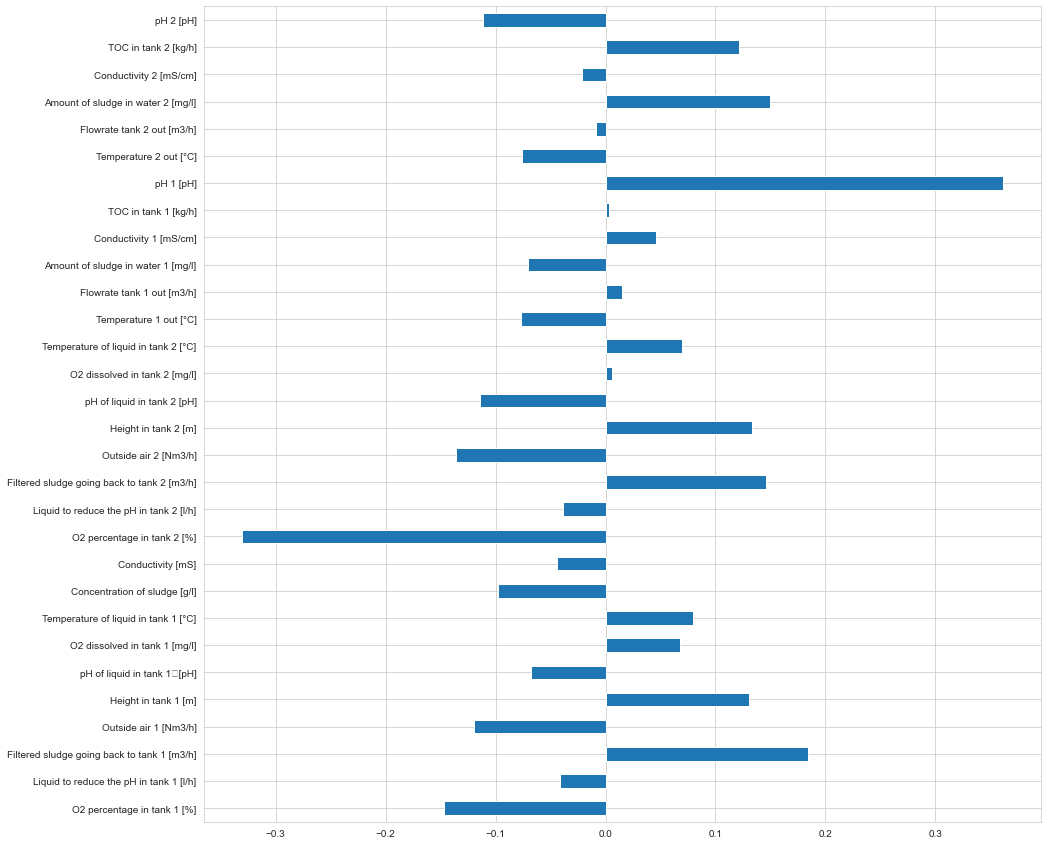

In [36]:
from scipy import stats
import matplotlib.pyplot as plt

stats.spearmanr(df_scaled)
rho, pval=stats.spearmanr(df_scaled)
corr=pd.Series(rho[:30,30], index=df_scaled.columns[0:30])
corr.plot(kind='barh',figsize=(15,15))
plt.show()

As allready shown in the heatmap there is not really a correlation between the features and the target.  No feature ranking is therefor possible.
Another technique that can be used for feature ranking is the random forest model.  We divide the data into subsets at each level of the decision tree.  Unfortunately our data contains NaN values, which cannot be treated by RandomForestRegressor.

Error message:
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Seasonality
In this part we look for possible seasonal occurence in the target.

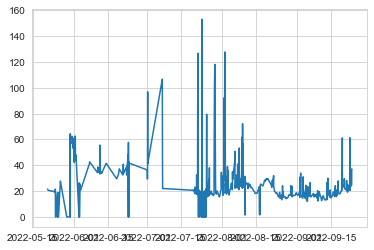

In [37]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (30,20)
ax.plot(clean_data['Target variable [mg/L]'])

the trend certainly does not indicate a multiplicative model, if we would take seasonality into account we would choose additive model.

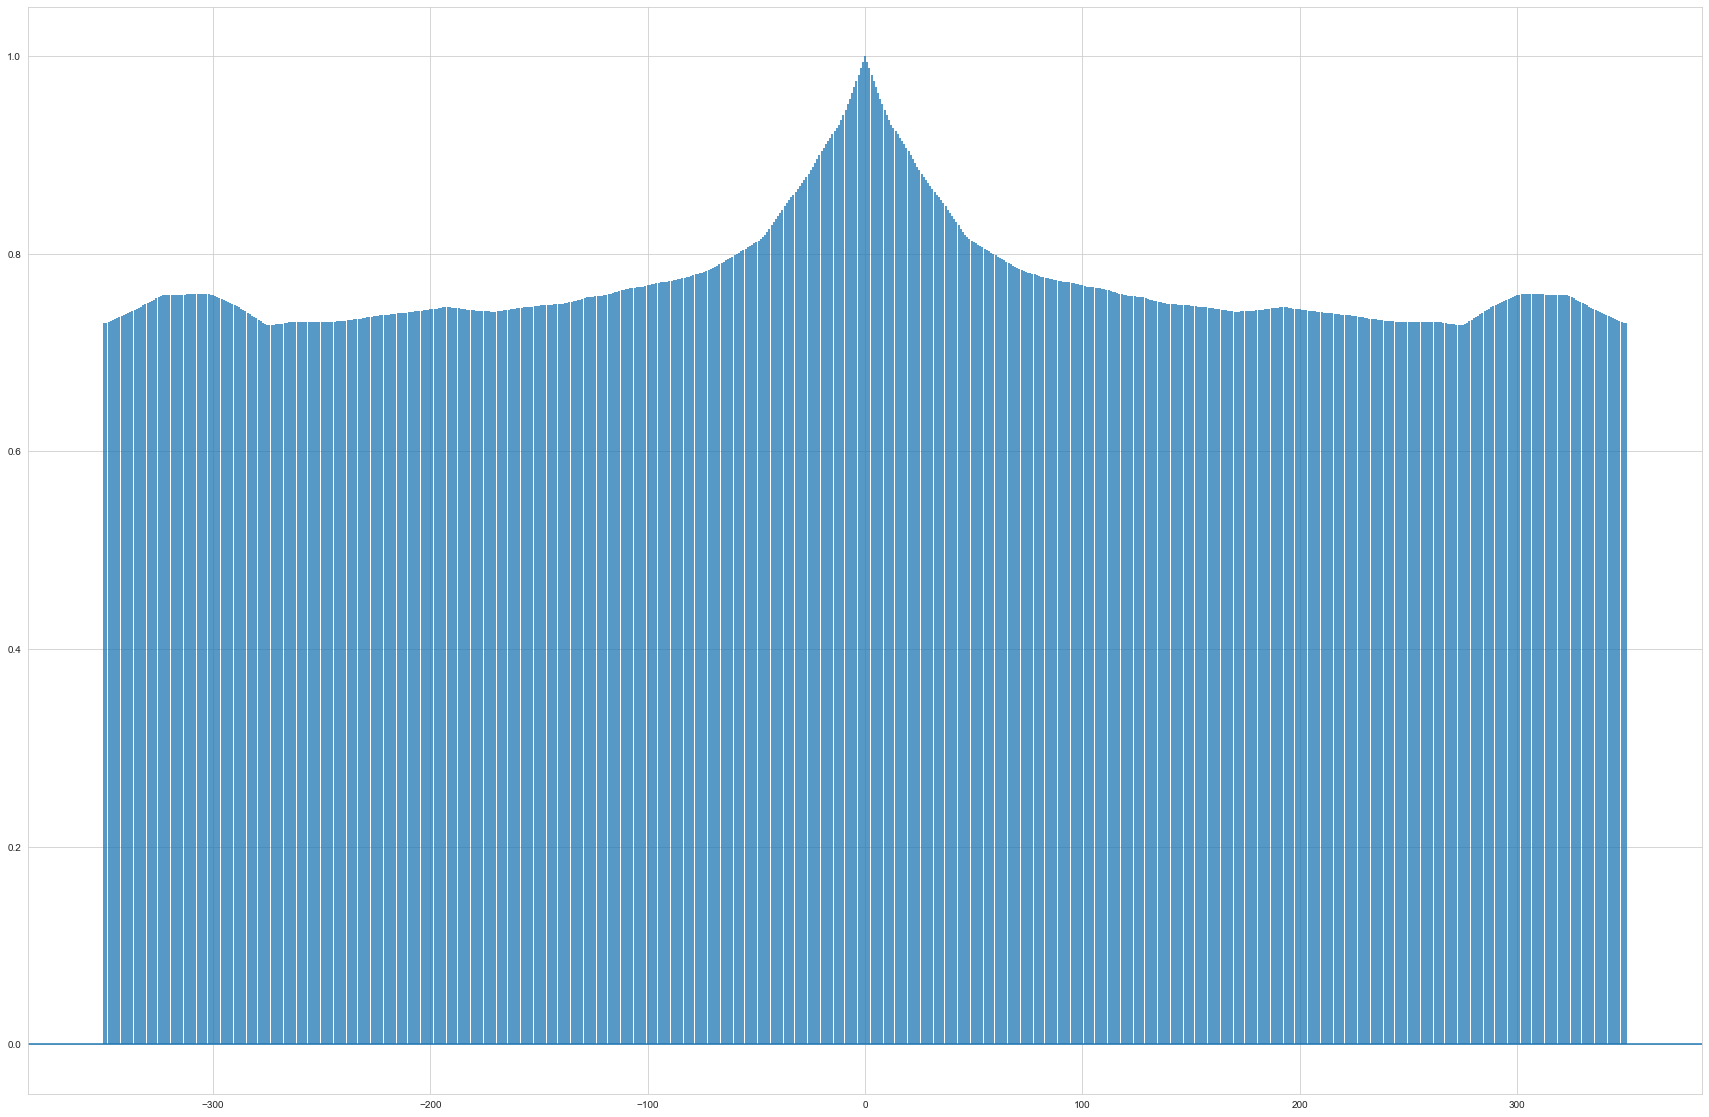

In [38]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (5,5)
lags, acfs, _, _ = ax.acorr(clean_data['Target variable [mg/L]'].to_numpy(dtype=float), maxlags=350)

Whatever change is made in the amount of lags, no seasonality is found. There is a small peak at 300, that is 300x5 minutes.  I suppose this value should be 288, which corresponds to 288x5 =  1440 minutes which 24 hours.  The daily trend of day and night is thus seen for a bit but not strong enough.

# Supervised learning
Before going into neural networks, we first explore some other supervised learning techniques.  We did not go into unsupervised learning techniques like LDA, PCA or clustering.  The reason for this is that the most important requirement being that the variables should not be correlated amongst themselves, is not true.  Variables of tank 1 and 2 are clearly correlated, so to do unsupervised learning we would have to focus on 1 tank alone.  First we treat the problem as a regression problem, at the end we try and improve by making a classification of the target variable.

## Regression models

In [39]:
#deviding dataset into 70 % (train) and 30% test chuncks
from sklearn.model_selection import train_test_split
X = clean_data.drop('Target variable [mg/L]',axis=1).values
y = clean_data['Target variable [mg/L]'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Multilinear regression
In a mutlilinear model we try to understand the impact of each of the features on the target.  First we need to remove variables with high collinearity and thus we only work on tank 1.  Other collinear variables from the correlation table above are amount of air, TOC and amount of sludge.  We keep TOC in tank 1, the rest will be removes as well.

In [40]:
columns = ['O2 percentage in tank 2 [%]',
       'Liquid to reduce the pH in tank 2 [l/h]',
       'Filtered sludge going back to tank 2 [m3/h]', 'Outside air 2 [Nm3/h]','Outside air 1 [Nm3/h]',
       'Height in tank 2 [m]', 'pH of liquid in tank 2 [pH]',
       'O2 dissolved in tank 2 [mg/l]', 'Temperature of liquid in tank 2 [°C]',
        'Temperature 2 out [°C]',
       'Flowrate tank 2 out [m3/h]', 'Amount of sludge in water 2 [mg/l]','Amount of sludge in water 1 [mg/l]',
       'Conductivity 2 [mS/cm]', 'TOC in tank 2 [kg/h]', 'pH 2 [pH]',
       ]

df_multiLL = df_scaled.drop(columns, axis=1)

C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<AxesSubplot: >

C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


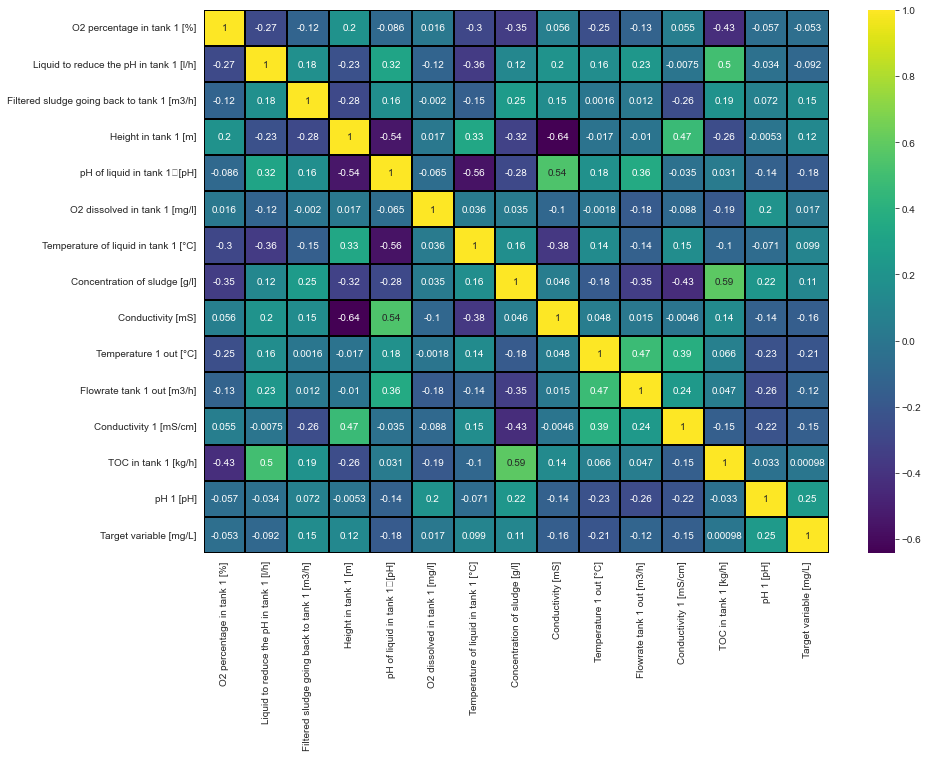

In [41]:
plt.figure(figsize=(14,10))
sns.heatmap(df_multiLL.corr(),linewidths=2, linecolor='black',cmap='viridis', annot=True)

Define x feature and the target variable.

In [42]:
y_multiLL = df_multiLL['Target variable [mg/L]']
x_multiLL =df_multiLL.drop(['Target variable [mg/L]'], axis=1)

Split into training and test set.

In [43]:
from sklearn.model_selection import train_test_split
seed= 1000
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x_multiLL, y_multiLL, test_size=0.3)

In [44]:
from sklearn.linear_model import LinearRegression
np.random.seed(seed)
lm = LinearRegression()

In [45]:
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
print(lm.intercept_)

-0.006750933148782898


In [47]:
# coefficients of the linear regression model.  These coefficients together with the intercept can be used to formulate the linear regression equation.  This equation can be used to predict the target.

In [48]:
coeff_df = pd.DataFrame(lm.coef_,x_multiLL.columns,columns=['Coefficient'])
coeff_df

,Coefficient
O2 percentage in tank 1 [%],-0.102595
Liquid to reduce the pH in tank 1 [l/h],-0.071319
Filtered sludge going back to tank 1 [m3/h],0.183162
Height in tank 1 [m],0.227028
pH of liquid in tank 1\t[pH],-0.040439
O2 dissolved in tank 1 [mg/l],-0.024895
Temperature of liquid in tank 1 [°C],0.063343
Concentration of sludge [g/l],-0.034075
Conductivity [mS],0.055342
Temperature 1 out [°C],-0.162886


Text(0.5, 1.0, 'Actual Vs. Predicted Training')

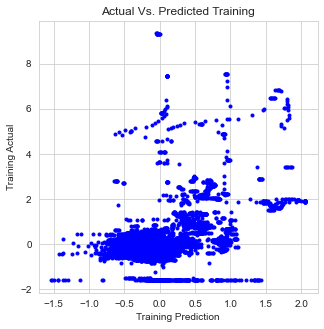

In [49]:
y_prediction=lm.predict(X_train)
plt.plot(y_prediction, y_train, 'b.')
plt.xlabel('Training Prediction')
plt.ylabel('Training Actual')
plt.title('Actual Vs. Predicted Training')

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

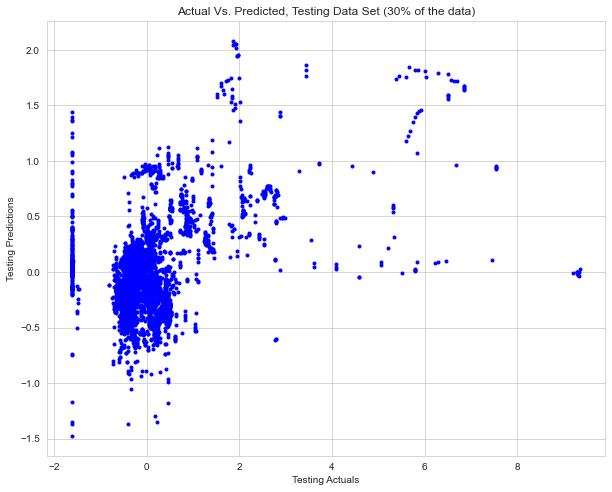

In [50]:
plt.figure(figsize=(10,8))
y_pred = lm.predict(X_test)
plt.plot(y_test,y_pred, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)')

Evaluation metrix :
- **MAE** (Mean Absolute Error) = $\dfrac{1}{n}{\displaystyle \sum_{i=0}^{n-1}}\left|e_{i}\right|$
- **RMSE** (Root Mean Squared Error) = $\sqrt{\dfrac{1}{n}{\displaystyle \sum_{i=0}^{n-1}}e_{i}^{2}}$
- **MAPE** (Mean Absolute Percentage Error) = $\dfrac{1}{n}{\displaystyle {\displaystyle \sum_
  {i=0}^{n-1}}}\left|\dfrac{e_{i}}{x_{i}}\right|$

In [51]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))

MAE: 0.51743
MSE: 0.89709
RMSE: 0.94715


High error scores, so linear regression is not a good model to use for this case.

#### Gradient boosting
Gradient boosting is another type of supervised ML algorithm.  The final model is generated based on many individual models.  Gradient boosting will train many models sequentially by placing more weights on instances with faulty predictions.  A sequential model using gradient boosting will just like AAN, gradually minimize a loss function.
The gradient in essence indicates the direction that the model parameters have to change to reduce the error in the next round of training.
The main difference with ANN is that an ANN tries to minimize the loss function in a single model, while gradient boosting used multiple models.

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(seed)

#n_estimators is the number of boosting stages or the number of trees in the forest
gb= GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100,  \
    criterion='friedman_mse', min_samples_split=4, min_samples_leaf=2, max_depth=3, max_features=None)

In [53]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=4)

In [54]:
y_pred_train=gb.predict(X_train)
y_pred_test=gb.predict(X_test)

In [55]:
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]

print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4))

Training Data R^2= 0.8437 R= 0.9185


In [56]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1]

print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4))

Testing Data R^2= 0.8073 R= 0.8985


Text(0.5, 1.0, 'Training Actual Vs. Prediction')

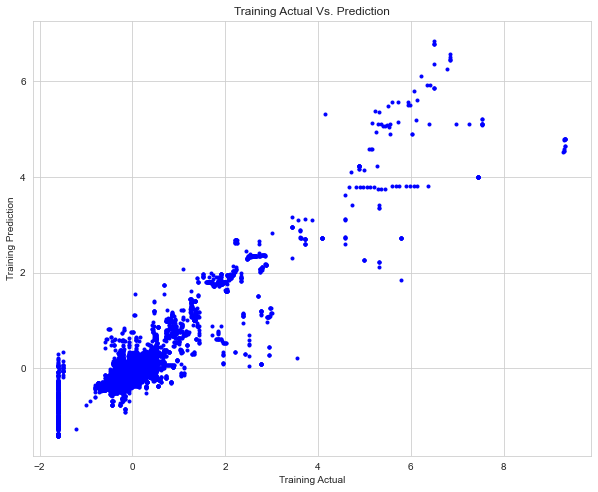

In [57]:
plt.figure(figsize=(10,8))
plt.plot(y_train, y_pred_train, 'b.')
plt.xlabel('Training Actual')
plt.ylabel('Training Prediction')
plt.title('Training Actual Vs. Prediction')

Text(0.5, 1.0, 'Testing Actual Vs. Prediction')

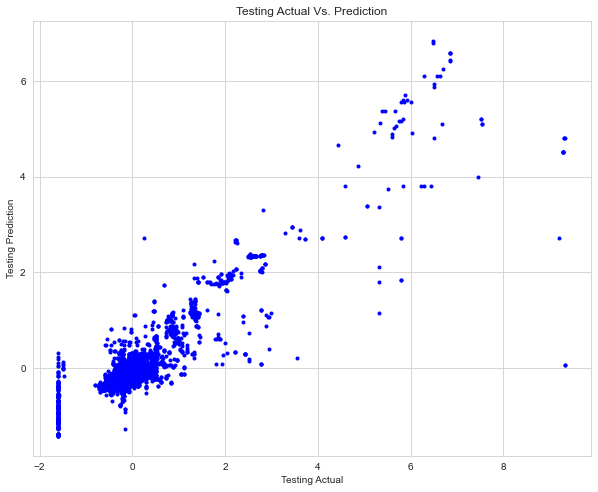

In [58]:
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'b.')
plt.xlabel('Testing Actual')
plt.ylabel('Testing Prediction')
plt.title('Testing Actual Vs. Prediction')

In [59]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),5))

MAE: 0.25598
MSE: 0.23902
RMSE: 0.4889


The errors are allready much lower compared to the linear regression model.

Looking at feaure importance of each input variable meaning the impact each variable has on the gradient boosting model.

Text(0.5, 1.0, 'Feature Importance Ranking')

C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


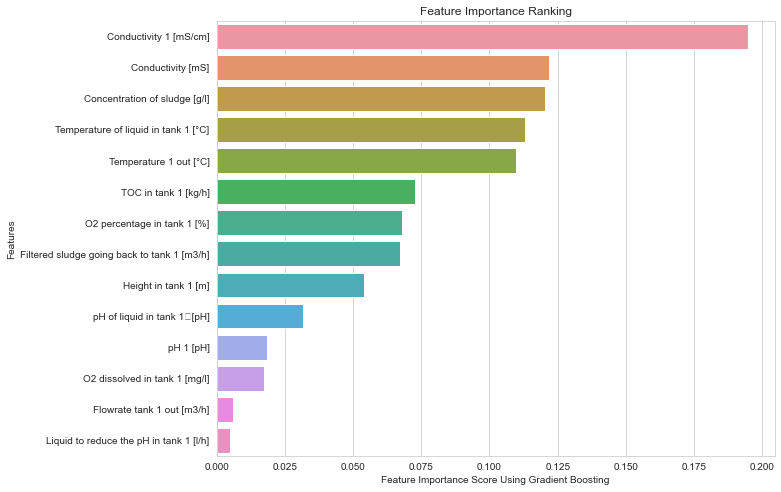

In [60]:
df_GB = df_multiLL
feature_names = df_GB.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp = pd.Series(gb.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Gradient Boosting')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

Permutation feature importance meaning the decrease in a model score when a certain variable is randomly shuffled.  The bigger the drop the more impact a feature has.

<ipython-input-61-50cc2bd603d3>:16: UserWarning: Glyph 9 (	) missing from current font.
  fig.tight_layout()
C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


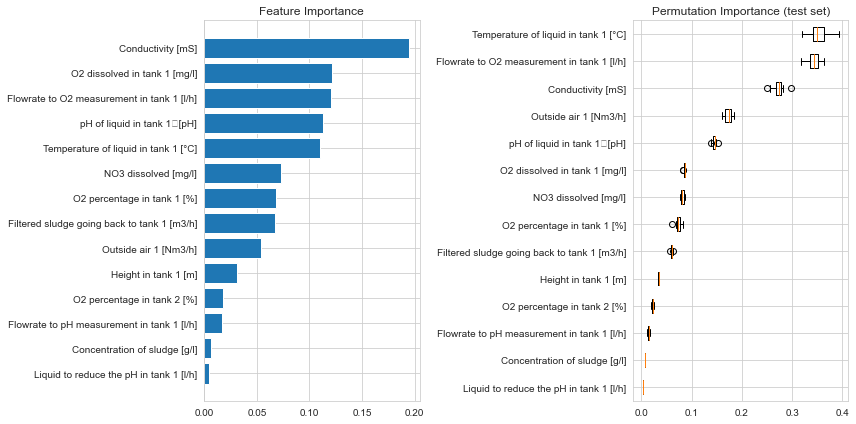

In [61]:
from sklearn.inspection import permutation_importance
feature_importance = gb.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')

result = permutation_importance(gb, X_test, y_test, n_repeats=10,random_state=seed)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

These rankings clearly indicate that pH (~related to conductivity) and oxygen have an impact on the target.

For future actions, extreme gradient boosting could be used as well.  The difference is that the gradient is calculated differently (second partial derivative of the loss function).  This gives more informaion on the direction of the gradient and therefor adds to the efficiency of the model.

### Neural networks

First we build a 'simple' RNN and adopt the parameters and see what effect it has on the loss function.

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [63]:
model = Sequential()

#input layer
model.add(Dense(14,activation='relu'))
model.add(Dropout(0.5))

#second layer
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))

#third layer
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [64]:
# training the model using early stopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400,callbacks=[early_stop])

Epoch 1/400
93/93 [==============================] - 1s 4ms/step - loss: 1.3105 - val_loss: 1.0302
Epoch 2/400
93/93 [==============================] - 0s 2ms/step - loss: 1.0396 - val_loss: 1.0376
Epoch 3/400
93/93 [==============================] - 0s 2ms/step - loss: 0.9804 - val_loss: 1.0367
Epoch 4/400
93/93 [==============================] - 0s 2ms/step - loss: 0.9754 - val_loss: 1.0397
Epoch 5/400
93/93 [==============================] - 0s 2ms/step - loss: 0.9492 - val_loss: 1.0367
Epoch 6/400
93/93 [==============================] - 0s 2ms/step - loss: 0.9490 - val_loss: 1.0255
Epoch 7/400
93/93 [==============================] - 0s 2ms/step - loss: 0.9194 - val_loss: 0.9972
Epoch 8/400
93/93 [==============================] - 0s 2ms/step - loss: 0.9030 - val_loss: 0.9836
Epoch 9/400
93/93 [==============================] - 0s 2ms/step - loss: 0.8860 - val_loss: 0.9618
Epoch 10/400
93/93 [==============================] - 0s 2ms/step - loss: 0.8920 - val_loss: 0.9529
Epoch 11/

<AxesSubplot: >

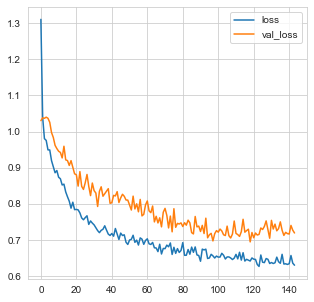

In [65]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Metrics

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [67]:
predictions = model.predict(X_test)

160/160 [==============================] - 0s 802us/step


In [68]:
print('MAE:', round(metrics.mean_absolute_error(y_test, predictions),5))
print('MSE:', round(metrics.mean_squared_error(y_test, predictions),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),5))

MAE: 0.41809
MSE: 0.71923
RMSE: 0.84807


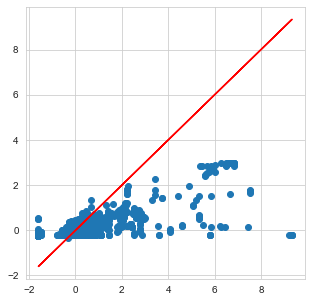

In [69]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

Results are worse then gradient boosting.

##### Choice of specific neural network

There are several possible NN models, each suitable for specific applications.  The most widely used are :
- Convolutional neural networks (CNN)   powerful for image recognition
- Recurrent neural networks (RNN)       text and speech recognition
- LSTM (subet of RNN)
- Self organizing map (SOM)
- Autoencoders
- Generative Adversial networks (GAN)


In my opinion an RNN is most suitable for the biology case because it is well suited to deal with sequential data such as time series or text sentences.  When time is involved the neural network should be able to deal with the importance of the data at each time step.  RNNs are designed to handle this consecutive data.  The main specification of the RNN is therefor that the output value of the previous time step is used to calculate the output of the current time step.
More technically, the hidden layer state of previous time step 'the memory' is carried forward and multiplied by a weight vector.  With this information the current hidden layer stated and output can be calculated.  For training RNNs backpropagation is used, however optimizing using gradient descent should be challenging.  To handle this problem LSTM can be used.


In essence an LSTM consists of connected memory cells controlling the flow.  These act a bit like a computer memory and have 3 important gates :
- input gate
- forget gate
- output gate
And most important these cells have memory.  So for each time step, it is decided if information is forgotten or passed through.

source: Machine learning Guide for Oil and Gas using Python by Belyadi and Haghighat.


##### Data preparation
source: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
The LSTM model will learn a function that maps a sequence of past observations as input to an output observation. As such, the sequence of observations must be transformed into multiple examples from which the LSTM can learn.
The split_sequence() function below implements this behavior and will split a given univariate sequence into multiple samples where each sample has a specified number of time steps and the output is a single time step.
(did not work)
source: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
(did the job)

In [70]:
from pandas import DataFrame
from pandas import concat

# convert series to supervised learning
def series_to_supervised(data, n_in=5, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
    agg.dropna(inplace=True)
 return agg

In [71]:
# frame as supervised learning
reframed = series_to_supervised(df_scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.782034   2.983552   1.054822  -0.242803  -0.674906  -1.513823   
2   0.790283   3.083765   1.054960  -0.263864  -0.674064  -1.520894   
3   0.798509   3.183978   1.055088  -0.284925  -0.673223  -1.527981   
4   0.806758   3.284190   1.055226  -0.305987  -0.672358  -1.535059   
5   0.814984   3.346068   1.055364  -0.327048  -0.671516  -1.542130   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var22(t)  var23(t)  \
1   0.762893   0.679337   0.906481    0.888243  ...  0.546074 -0.309501   
2   0.746548   0.677001   0.905756    0.886189  ...  0.546240 -0.306928   
3   0.730200   0.674664   0.905029    0.884135  ...  0.546404 -0.304356   
4   0.713851   0.672328   0.904304    0.882081  ...  0.546568 -0.301783   
5   0.697506   0.669991   0.903576    0.880027  ...  0.546733 -0.299210   

   var24(t)  var25(t)  var26(t)  var27(t)  var28(t)  var29(t)  var30(t)  \
1 -0.163948 -1.321643  0.257348 -0.122516 -1.34

In [72]:
print(reframed.columns)

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var13(t-1)', 'var14(t-1)', 'var15(t-1)',
       'var16(t-1)', 'var17(t-1)', 'var18(t-1)', 'var19(t-1)', 'var20(t-1)',
       'var21(t-1)', 'var22(t-1)', 'var23(t-1)', 'var24(t-1)', 'var25(t-1)',
       'var26(t-1)', 'var27(t-1)', 'var28(t-1)', 'var29(t-1)', 'var30(t-1)',
       'var31(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)', 'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)', 'var11(t)',
       'var12(t)', 'var13(t)', 'var14(t)', 'var15(t)', 'var16(t)', 'var17(t)',
       'var18(t)', 'var19(t)', 'var20(t)', 'var21(t)', 'var22(t)', 'var23(t)',
       'var24(t)', 'var25(t)', 'var26(t)', 'var27(t)', 'var28(t)', 'var29(t)',
       'var30(t)', 'var31(t)'],
      dtype='object')


In [73]:
# drop columns we don't want to predict, we use all vars from t-1, but from time t we only want the target
reframed.drop(reframed.columns[[31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.782034   2.983552   1.054822  -0.242803  -0.674906  -1.513823   
2   0.790283   3.083765   1.054960  -0.263864  -0.674064  -1.520894   
3   0.798509   3.183978   1.055088  -0.284925  -0.673223  -1.527981   
4   0.806758   3.284190   1.055226  -0.305987  -0.672358  -1.535059   
5   0.814984   3.346068   1.055364  -0.327048  -0.671516  -1.542130   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var23(t-1)  var24(t-1)  \
1   0.762893   0.679337   0.906481    0.888243  ...   -0.312073   -0.415720   
2   0.746548   0.677001   0.905756    0.886189  ...   -0.309501   -0.163948   
3   0.730200   0.674664   0.905029    0.884135  ...   -0.306928   -1.602896   
4   0.713851   0.672328   0.904304    0.882081  ...   -0.304356   -0.483903   
5   0.697506   0.669991   0.903576    0.880027  ...   -0.301783    0.097970   

   var25(t-1)  var26(t-1)  var27(t-1)  var28(t-1)  var29(t-1)  var30(t-1)  \
1   -1.420798    0.53

##### Train test split

In [74]:
# split into train and test sets
values = reframed.values
len(values)

16999

In [75]:
# split into 70% training data and 30% testing data
split = 70
n_train_duration = int(70*len(values)/100)  # cast to integer
train = values[:n_train_duration, :]
test = values[n_train_duration:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(11899, 1, 31) (11899,) (5100, 1, 31) (5100,)


##### Building LSTM

In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout

Epoch 1/50
166/166 - 2s - loss: 0.5759 - val_loss: 0.4448 - 2s/epoch - 12ms/step
Epoch 2/50
166/166 - 0s - loss: 0.4178 - val_loss: 0.5021 - 305ms/epoch - 2ms/step
Epoch 3/50
166/166 - 0s - loss: 0.2996 - val_loss: 0.4033 - 309ms/epoch - 2ms/step
Epoch 4/50
166/166 - 0s - loss: 0.2472 - val_loss: 0.2692 - 301ms/epoch - 2ms/step
Epoch 5/50
166/166 - 0s - loss: 0.1931 - val_loss: 0.2006 - 309ms/epoch - 2ms/step
Epoch 6/50
166/166 - 0s - loss: 0.2146 - val_loss: 0.1682 - 308ms/epoch - 2ms/step
Epoch 7/50
166/166 - 0s - loss: 0.1463 - val_loss: 0.1732 - 305ms/epoch - 2ms/step
Epoch 8/50
166/166 - 0s - loss: 0.1437 - val_loss: 0.2371 - 308ms/epoch - 2ms/step
Epoch 9/50
166/166 - 0s - loss: 0.1733 - val_loss: 0.2030 - 300ms/epoch - 2ms/step
Epoch 10/50
166/166 - 0s - loss: 0.1734 - val_loss: 0.1608 - 309ms/epoch - 2ms/step
Epoch 11/50
166/166 - 0s - loss: 0.1719 - val_loss: 0.1364 - 289ms/epoch - 2ms/step
Epoch 12/50
166/166 - 0s - loss: 0.1454 - val_loss: 0.1355 - 304ms/epoch - 2ms/step
Epo

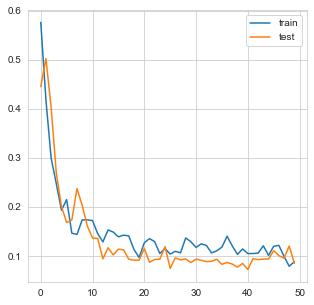

In [77]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                16400     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 16,451
Trainable params: 16,451
Non-trainable params: 0
_________________________________________________________________


##### Evaluate the Model

In [79]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
from math import sqrt

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = std_scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = std_scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE

print('MAE:', round(metrics.mean_absolute_error(inv_y, inv_yhat),5))
print('MSE:', round(metrics.mean_squared_error(inv_y, inv_yhat),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(inv_y, inv_yhat)),5))

160/160 [==============================] - 0s 1ms/step
MAE: 0.0367
MSE: 0.00297
RMSE: 0.05447


##### Visualization

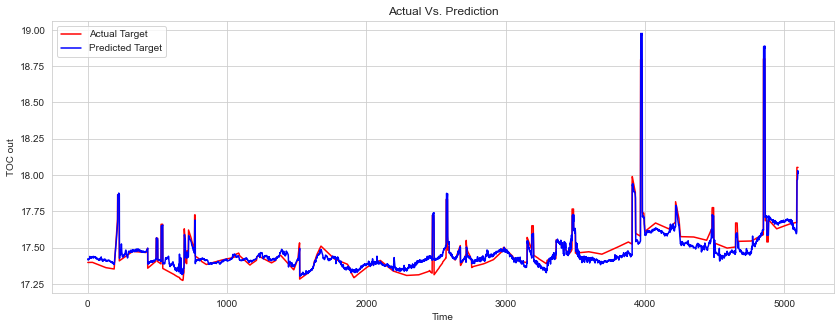

In [80]:
plt.figure(figsize=(14,5))
plt.plot(inv_y, color='red', label='Actual Target')
plt.plot(inv_yhat, color='blue', label='Predicted Target')
plt.title('Actual Vs. Prediction')
plt.xlabel('Time')
plt.ylabel('TOC out')
plt.legend()

# Classification models

In this section we convert the continous target data to discrete data.  We use 3 bins of 20 mg/l, 30 mg/l and 40mg/l, these values are then considered low, normal and high.  High target means there is a plant upset and the waste water should be diverted to a buffer tank.
We use the complete cleaned dataset.

In [81]:
# A column of name 'Label' is created in
# Categorizing target into 3 Categories
# Low: (0,20], 0 is excluded & 20 is included
# Normal: (20,30], 20 is excluded & 30 is included
# High: (30,210], 30 is excluded & 210 is included
bins = [-np.inf, 20,30 ,210]

clean_data['Label'] = pd.cut(x=clean_data['Target variable [mg/L]'],
                     bins=bins,
                     labels=['Low','Normal', 'High'])

clean_data['Label'] = pd.Categorical(clean_data['Label'])
clean_data['Label']=clean_data['Label'].replace(['Low','Normal', 'High'],[1, 2,3])

<AxesSubplot: xlabel='Label', ylabel='count'>

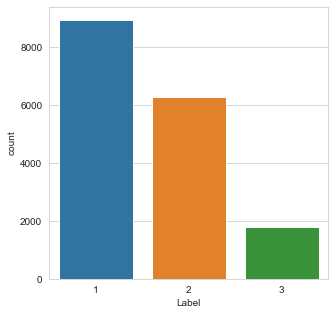

In [82]:
sns.countplot(x='Label', data=clean_data)

In [83]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y = clean_data['Label']
x = clean_data.drop(['Label'], axis=1)
x_scaled=scaler.fit(x)
x_scaled=scaler.transform(x)
x_scaled

array([[0.82490952, 0.38380143, 0.76022114, ..., 0.1901746 , 0.34466208,
        0.14047457],
       [0.82627389, 0.39124501, 0.76023185, ..., 0.18038807, 0.34528859,
        0.14041927],
       [0.82763444, 0.39868854, 0.7602418 , ..., 0.17060154, 0.34591509,
        0.14036398],
       ...,
       [0.80808992, 0.1962593 , 0.68265508, ..., 0.50445396, 0.14737117,
        0.24265456],
       [0.81215628, 0.19099967, 0.68287907, ..., 0.51474274, 0.14887346,
        0.24265214],
       [0.81621882, 0.19023885, 0.68300101, ..., 0.63097185, 0.15024259,
        0.24264972]])

In [84]:
# train test split
seed= 50
np.random.seed(seed)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size= 0.30)

##### Support vector machine

In [85]:
from sklearn import svm

In [86]:
np.random.seed(seed)
svm = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=1, tol=0.001)

In [87]:
svm.fit(x_train, y_train)

SVC(gamma=1)

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Accuracy Score: 0.9535294117647058
Confusion Matrix:
[[2594   58    0]
 [ 107 1789    5]
 [   3   64  480]]
              precision    recall  f1-score   support

           1       0.96      0.98      0.97      2652
           2       0.94      0.94      0.94      1901
           3       0.99      0.88      0.93       547

    accuracy                           0.95      5100
   macro avg       0.96      0.93      0.95      5100
weighted avg       0.95      0.95      0.95      5100



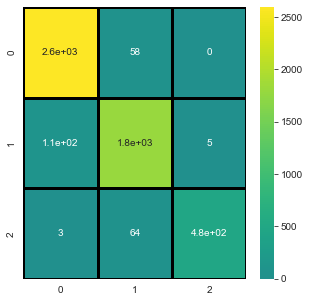

In [89]:
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center=True, annot=True, cmap='viridis', linewidths=3, linecolor='black')
plt.show()

Out of the 5100 occurences, 4863 occurences were predicted correctly. More importantly, out of the somewhat 500 occurences of high TOC outpout, 480 were predicted.

##### Random forest classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(seed)
rf = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=5,
     max_features='auto')

In [91]:
rf.fit(x_train, y_train)

C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_leaf=5,
                       n_estimators=500)

Accuracy Score: 1.0
Confusion Matrix:
[[2652    0    0]
 [   0 1901    0]
 [   0    0  547]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2652
           2       1.00      1.00      1.00      1901
           3       1.00      1.00      1.00       547

    accuracy                           1.00      5100
   macro avg       1.00      1.00      1.00      5100
weighted avg       1.00      1.00      1.00      5100



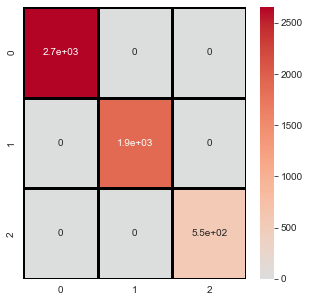

In [92]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center=True, annot=True, cmap='coolwarm', linewidths=3, linecolor='black')
plt.show()

Seems like all categories have been predicted.
Looking at the feature importance :

##### Gradient boosting classifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
np.random.seed(seed)
gb =GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=500, criterion='friedman_mse',
                               min_samples_split=2, min_samples_leaf=1, max_depth=3,max_features=None)

In [95]:
gb.fit(x_train, y_train)

C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GradientBoostingClassifier(loss='deviance', n_estimators=500)

Accuracy Score: 1.0
Confusion Matrix:
[[2652    0    0]
 [   0 1901    0]
 [   0    0  547]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2652
           2       1.00      1.00      1.00      1901
           3       1.00      1.00      1.00       547

    accuracy                           1.00      5100
   macro avg       1.00      1.00      1.00      5100
weighted avg       1.00      1.00      1.00      5100



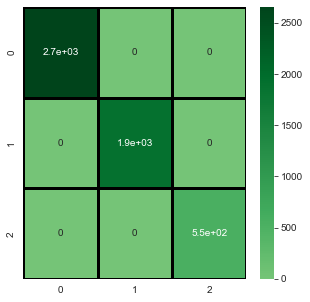

In [96]:
y_pred = gb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, center=True, annot=True, cmap='Greens', linewidths=3, linecolor='black')
plt.show()

<ipython-input-97-7b12468c8478>:16: UserWarning: Glyph 9 (	) missing from current font.
  fig.tight_layout()
C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\avanloon\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


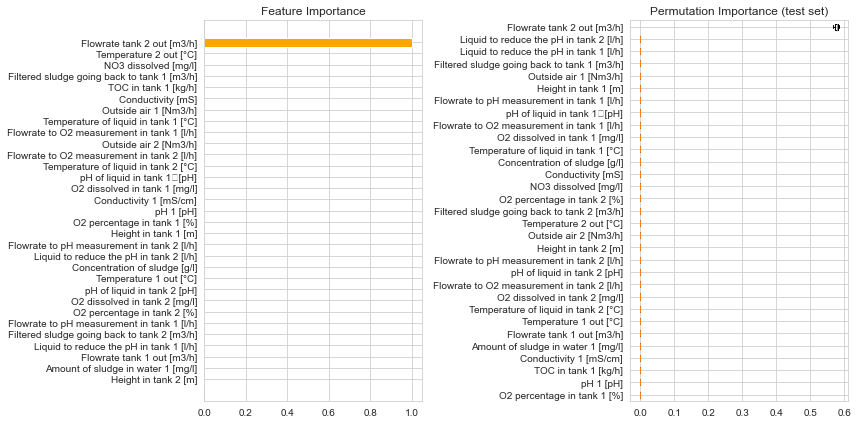

In [97]:
from sklearn.inspection import permutation_importance
feature_importance = gb.feature_importances_
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_features], align='center', color='orange')
plt.yticks(pos, np.array(df.columns)[sorted_features])
plt.title('Feature Importance')

result = permutation_importance(gb, x_test, y_test, n_repeats=10,random_state=seed)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()

# Conslusion

- overall the regression models do not perform very well.  The LSTM model seems to give the best results, followed by gradient boosting.
- looking at classification, then the models seem to predict pretty well 3 categories (low, normal, high) of TOC levels out of the tanks
- feature ranking indicates that pH, conductivity and O2 play an important role for the target.  It would be maybe good to isolate these variables, get rid of everything else and model these parameters alone.